# Исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов 

## Введение 
<a id='intro'></a>

**Вводные данные проекта:**

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно определить рыночную стоимость объектов недвижимости и построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Целями исследования являются:** 
- описание типовых характеристик объектов недвижимости в базе по основным параметрам;
- оценка средних сроков продажи недвижимости; 
- выявление факторов, влияющих на общую стоимость недвижимости;
- оценка зависимость стоимости от года размещения объявления, месяца и дня недели;
- определение ТОП-10 населенных пунктов по средней стоимости недвижимости за 1 кв.м.;
- оценка зависимости стоимости объектов от расстояния до центра города Санкт-Петербурга.

**Данные для анализа и построения модели:** по каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Временной интервал предоставленных данных** (даты размещения объявлений в выгрузке): c 27.11.2014 до 03.05.2019 гг.

**Этапы проведения исследования:**
1. Изучить общую информацию об имеющейся базе
2. Провести предобработку данных:
   - анализ пропущенных значений и типов данных;
   - поиск дубликатов и аномалий в данных.
3. Добавить в таблицу дополнительные расчетные столбцы:
   - цена за 1 кв.м., 
   - день недели публикации объявления; 
   - месяц, год публикации объявления; 
   - тип этажа квартиры; 
   - расстояние до центра города в км.
4. Провести исследовательский анализ данных:
   - описать типичные значения по различным параметрам объекта;
   - оценить сроки продажи квартир;
   - выявить факторы, влияющие на общую стоимость объекта;
   - определить ТОП-10 населенных пунктов по средней стоимости недвижимости за 1 кв.м.;
   - оценить зависимости стоимости объектов от расстояния до центра города Санкт-Петербурга.
5. Сформулировать общий вывод по результатам исследования  

## Изучение общей информации о файле 

### Загрузка данных из файла в датафрейм

In [1]:
# загрузка нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
# откроем файл с данными и выведем на экран первые пять строк
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Общая информация о полученном датафрейме

In [3]:
# посмотрим общую информацию о датафрейме
# верно ли определен тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# переименуем столбец датафрейма (приведем наименование cityCenters_nearest в змеиный_регистр)
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}) 

Необходимы изменения форматов:
- first_day_exposition - нужно будет привести к формату даты;
- is_apartment необходимо изменить на bool;
- floors_total, balcony, airports_nearest, city_centers_nearest,  parks_around3000,  parks_nearest,  ponds_around3000, ponds_nearest, days_exposition необходимо заменить на int.

### Оценка общей информации о данных

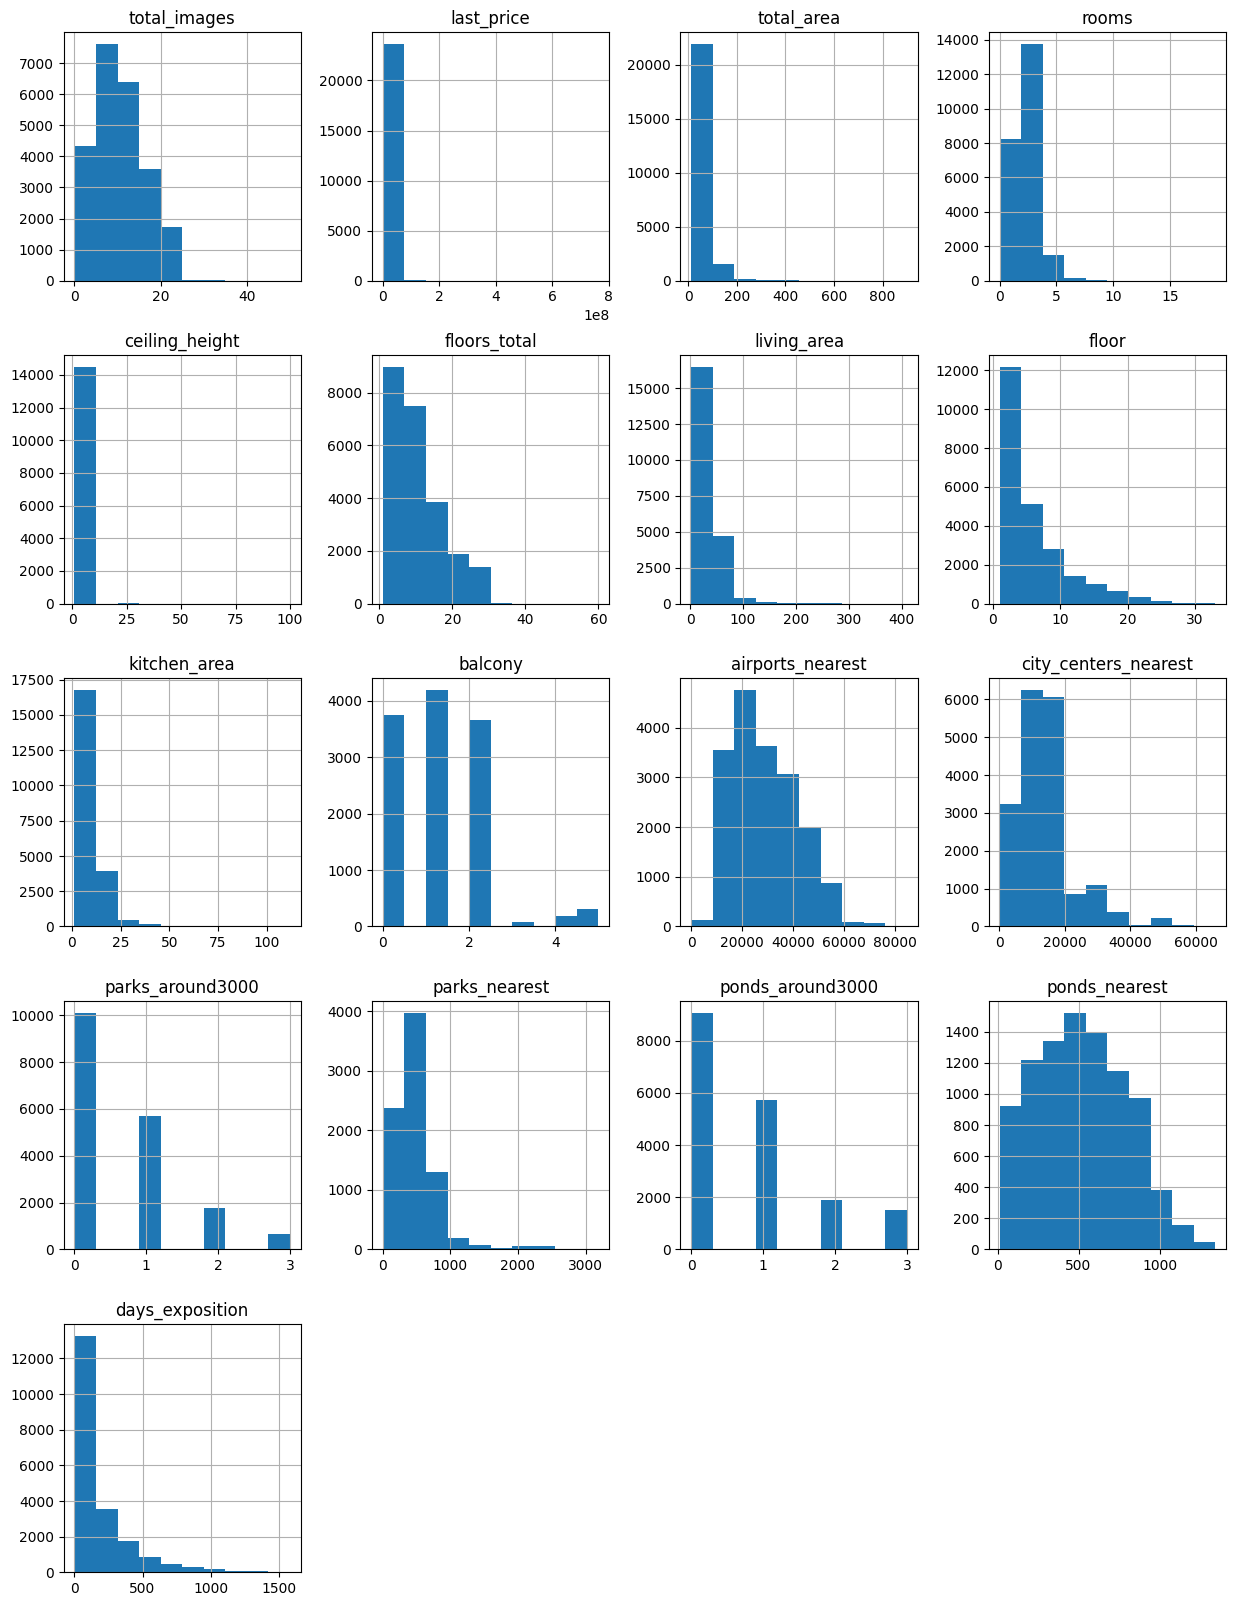

In [5]:
# построим общую гистограмму для всех столбцов
data.hist(figsize=(15, 20))
plt.show()

**Выводы:**
1. В данных есть пропущенные значения, которые необходимо скорректировать, если в этом будет потребность при проведении анализа.
2. Необходимо изменить тип данных в части столбцов на datetime, bool, int.
3. Поиск аномальных значений следует начать со столбцов last_price, area (total_area, living_area, kitchen_area), ceiling_height, rooms, так как, судя по гистограммам, данные имеют значительное отклонение от нормального распределения.

## Предобработка данных

### Анализ пропущенных значений

#### Оценка наличия и количества пропусков в данных

In [6]:
# определим количество пропусков в данных в каждом столбце датафрейма
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Самый большой процент пропусков в столбце is_apartment (88%), скорее всего, поле просто не заполнялось, если недвижимость не являлась апартаментами. Поступим с данными пропусками также, как с пропущенными значениями по наличию балкона.

В ceiling_height отсутствует 39% значений, удаление такого объема пропусков значительно сократит базу для анализа, поэтому определим те пропуски, которые можно заполнить без существенного искажения исходных данных. <a id='ceiling'></a>

In [7]:
# посмотрим локализацию пропущенных значений в разрезе населенных пунктов
locality_name_ceiling_isna = (
    data.loc[data['ceiling_height'].isna() == True, :]
    .pivot_table(index='locality_name', values='last_price', aggfunc=['count']))
locality_name_ceiling_isna.columns = ['count_isna']
display(locality_name_ceiling_isna.sort_values('count_isna', ascending=False).head(10))

,count_isna
locality_name,
Санкт-Петербург,5617
посёлок Мурино,322
посёлок Шушары,223
посёлок Парголово,190
деревня Кудрово,177
Гатчина,158
Выборг,139
Пушкин,135
Колпино,135


Большая часть пропусков приходится на Санкт-Петербург. Далее посмотрим процент пропусков в каждом населенном пункте для принятия решения о возможности их заполнения медианными значениями.

Для этого выполним следующие шаги:
1. Рассчитаем медианные значения по каждому населенному пункту, где выборка для определения медианы более 5 объектов.
2. Заполним пропуски медианой только там, где количество выборки для расчета не менее 5 объектов, а доля пропущенных значений составит не более 30% от всего объема данных по населенному пункту.

In [8]:
# рассчитаем медианные значения ceiling_height и количество объектов по каждомy населенному пункту
# при условии, что количество выборки для расчета медианы не менее 5 объектов
locality_name_ceiling =  data.pivot_table(index='locality_name', values='ceiling_height', aggfunc=['median', 'count'])
locality_name_ceiling.columns = ['median', 'count_object']
locality_name_ceiling = locality_name_ceiling.query('count_object >= 5')
display(locality_name_ceiling.sort_values('count_object', ascending=False))

,median,count_object
locality_name,,
Санкт-Петербург,2.70,10104
Всеволожск,2.70,272
Пушкин,2.60,234
посёлок Шушары,2.63,217
Колпино,2.50,203
...,...,...
Новая Ладога,2.50,5
поселок городского типа Вырица,2.50,5
Каменногорск,2.60,5


In [9]:
# объединим таблицу с количеством пропусков с медианными значениями по населенным пунктам
locality_name_ceiling_group = locality_name_ceiling.join(locality_name_ceiling_isna)

# рассчитаем долю пропусков в каждом населенном пункте
locality_name_ceiling_group['share_isna'] = (
    locality_name_ceiling_group['count_isna']/
    (locality_name_ceiling_group['count_object'] + locality_name_ceiling_group['count_isna'])
)

# оставим в таблице для заполнения пропусков только те населенные пункты, которые соответствуют условиям:
# количество выборки для расчета не менее 5 объектов,
#доля пропущенных значений составляет не более 30% от всего объема данных по населенному пункту
locality_name_ceiling_group = (
    locality_name_ceiling_group.query('share_isna < 0.3').sort_values('share_isna', ascending=False))

print('Значение медианой будет заполнено по следующему количеству значений:', locality_name_ceiling_group['count_isna'].sum())
print()
print('Населенные пункты, по которым пропуски будут заполнены медианой')
display(locality_name_ceiling_group)

Значение медианой будет заполнено по следующему количеству значений: 316.0

Населенные пункты, по которым пропуски будут заполнены медианой


,median,count_object,count_isna,share_isna
locality_name,,,,
Сестрорецк,2.700,129,54.0,0.295082
посёлок городского типа имени Морозова,2.600,12,5.0,0.294118
Сертолово,2.600,101,41.0,0.288732
Кириши,2.500,89,36.0,0.288000
село Павлово,2.750,5,2.0,0.285714
Шлиссельбург,2.500,41,16.0,0.280702
Петергоф,2.550,145,56.0,0.278607
Светогорск,2.500,8,3.0,0.272727
посёлок городского типа Лебяжье,2.500,8,3.0,0.272727


#### Заполнение пропущенных значений

In [10]:
# заменим пустые значения в булевых данных is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

# заменим пустые значения в столбце balcony, предположительно там тоже были пропуски при отсутствии балкона
data['balcony'] = data['balcony'].fillna(0)

Заполним часть пропусков в ceiling_height.
<a id='ceiling2'></a>

In [11]:
# создадим функцию для заполнения пропущенных значений по высоте потолка в зависимости от населенного пункта
def ceiling(row):
    try:
        for name in locality_name_ceiling_group:
            if row['locality_name'] == name:
                ceiling = locality_name_ceiling_group['median']
                return ceiling 
    except:
        return row['ceiling_height']

In [12]:
# заменим пропущенные значения в датафрейме
data['ceiling_height'] = data['ceiling_height'].fillna(data.apply(ceiling, axis=1))   

В столбцах, где пропуски не позволяют изменить тип данных или применить необходимые методы обработки, вставим значения-заглушки. В числовых -999, а в текстовом 'нет данных'. При анализе средних показателей такие данные будут исключаться.

In [13]:
# пропуски в floors_total заменим отрицательным значением (-999), чтобы можно было преобразовать данные в int и обрабатывать их
# значение-заглушка (-999) в дальнейшем будет исключаться из анализа
data['floors_total'] = data['floors_total'].fillna(-999)

# пропуски в названии заменим на "нет данных", так как пропущенные значения затруднят категоризацию данных
data['locality_name'] = data['locality_name'].fillna('нет данных')

В столбце days_exposition пропуски значений, скорее всего, означают, что объявление все еще активно. Таких объявлений 13,4% от общего числа объявлений, поэтому их исключение приведет к потере данных по остальным параметрам недвижимости. В то же время анализировать их как проданные объекты тоже нельзя - это  исказит картину по срокам продажи.  Чтобы заполнить пропуски в days_exposition воспользуемся заглушкой (-999), а при анализе сроков продажи эти значения будут исключены.

In [14]:
# заменим пропуски в столбце days_exposition значением-заглушкой
data['days_exposition'] = data['days_exposition'].fillna(-999)

Для столбца kitchen_area (10% пропусков в данных) заполним пропуски в 2 этапа:
1. заполним пропущенные значения 0, если квартира имеет планировку studio или open_plan;
2. сгруппируем данные по количеству комнат и рассчитаем медианные значения для столбца kitchen_area, living_area и total_area, найдем долю кухни и жилой площади в общей площади квартиры в зависимости от количества комнат.

In [15]:
# заполним пропущенные значения 0, если квартира имеет планировку studio или open_plan

data.loc[(data['studio'] == True) | (data['open_plan'] == True), 'kitchen_area'] = (
    data.loc[(data['studio'] == True) | (data['open_plan'] == True), 'kitchen_area'].fillna(0)
)


In [16]:
# рассчитаем медианные значения для столбцов kitchen_area и total_area
kitchen_area_share = (
    data.query('kitchen_area.isna() == False').groupby('rooms')
    .agg({'kitchen_area': 'median','total_area':'median'})
)
# посчитаем долю кухни в общей площади квартиры
kitchen_area_share['share'] = kitchen_area_share['kitchen_area']/kitchen_area_share['total_area']
display(kitchen_area_share)

,kitchen_area,total_area,share
rooms,,,
0,0.00,26.05,0.000000
1,9.00,36.80,0.244565
2,8.80,53.00,0.166038
3,9.50,72.90,0.130316
4,11.05,99.05,0.111560
5,15.05,147.35,0.102138
6,19.50,183.70,0.106151
7,20.00,212.00,0.094340
8,25.00,235.00,0.106383


In [17]:
# создадим функцию для заполнения пропущенных значений в зависимости от количества комнат
# для этого умножим общую площадь квартиры на долю кухни из kitchen_area_share
def kitchen(row):
    try:
        for rooms_number in data['rooms'].sort_values().unique():
            if row['rooms'] == rooms_number:
                kitchen = row['total_area'] * (kitchen_area_share.loc[rooms_number, 'share'])
                return kitchen      
    except:
        return 'ошибка'

In [18]:
# рассчитаем медианные значения для столбцов living_area и total_area
living_area_share =(
    data.query('living_area.isna() == False').groupby('rooms')
    .agg({'living_area': 'median','total_area':'median'})
)
# посчитаем долю жилой площади в общей площади квартиры
living_area_share['share'] = living_area_share['living_area']/living_area_share['total_area']
display(living_area_share)

,living_area,total_area,share
rooms,,,
0,18.000,26.05,0.690979
1,17.600,36.50,0.482192
2,30.500,53.00,0.575472
3,45.000,72.60,0.619835
4,63.600,98.50,0.645685
5,91.785,145.20,0.632128
6,123.900,183.70,0.674469
7,145.000,213.00,0.680751
8,161.000,235.70,0.683072


In [19]:
# создадим функцию для заполнения пропущенных значений в зависимости от количества комнат
# для этого умножим общую площадь квартиры на долю жилой площади из living_area_share
def living(row):
    try:
        for rooms_number in data['rooms'].sort_values().unique():
            if row['rooms'] == rooms_number:
                liv = row['total_area'] * (living_area_share.loc[rooms_number, 'share'])
                return liv      
    except:
        return 'ошибка'

In [20]:
# заменим пропущенные значения в датафрейме
data['kitchen_area'] = data['kitchen_area'].fillna(data.apply(kitchen, axis=1))   
data['living_area'] = data['living_area'].fillna(data.apply(living, axis=1))  

Далее проверим, не является ли сумма площади кухни и жилой площади больше общей площади недвижимости. Для этого создадим столбец с разницей этих значений.
<a id='area'></a>

In [21]:
# рассчитаем разницу между общей площадью и суммой заполненных значений по жилой площади и кухни
# создадим тех столбец
data['diff_total_area'] = (data['total_area']*0.9) - (data['kitchen_area'] + data['living_area'])

# заменим значения, чтобы площади кухни на разницу общей площади и жилой
data.loc[data['diff_total_area'] < 0,'kitchen_area'] = ((data['total_area']*0.9) - data['living_area'])

In [22]:
# проверим, что значений отрицательных не осталось
data['diff_total_area'] = data['total_area'] - (data['kitchen_area'] + data['living_area'])
display(data.query('diff_total_area < 0')['diff_total_area']. count())

0

Далее оценим влияние пропусков в city_centers_nearest на результаты будущего анализа.
<a id='city'></a>

In [23]:
# посмотрим распределение пропущенных значений city_centers_nearest по населенным пунктам
city_centers_nearest_isna = (
    data.loc[data['city_centers_nearest'].isna() == True, :]
    .pivot_table(index='locality_name', values='last_price', aggfunc='count')
)
city_centers_nearest_isna.columns = ['count_isna']

# добавим в таблицу долю пропусков от всей базы
city_centers_nearest_isna['share_isna'] = city_centers_nearest_isna['count_isna']/data.shape[0]
display(city_centers_nearest_isna.sort_values('count_isna', ascending=False).head())

,count_isna,share_isna
locality_name,,
посёлок Мурино,522,0.022026
Всеволожск,398,0.016794
Гатчина,307,0.012954
деревня Кудрово,299,0.012617
Выборг,237,0.010000


Так как оценку зависимости стоимости объектов от расстояния до центра города нужно провести по Санкт-Петербургу, то необходимо проверить долю пропусков именно по данному городу.

In [24]:
# проверим, есть ли пропуски в расстоянии до центра города в Санкт-Петербурге
city_centers_nearest_isna[city_centers_nearest_isna.index == 'Санкт-Петербург']

,count_isna,share_isna
locality_name,,
Санкт-Петербург,61,0.002574


Доля пропусков в данных по расстоянию до центра Санкт-Петербурга отсутствует по 0,2% объектов.
Степень влияния на результат дальнейшего анализа минимальна.

Также наблюдаются пропуски более чем 50% в столбцах parks_nearest (66%) и ponds_nearest (62%). Данная информация является не ключевой для оценки недвижимости, поэтому пока оставим, так как есть. Возможно, отсутствие значений в этих столбцах не будет иметь влияние на результаты анализа. 

In [25]:
# удостоверимся, что заполнение пропусков там, где это было возможно, применилось
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
diff_total_area             0
dtype: int64

#### Причины пропусков данных

**Возможные причины пропусков данных:**

- Пропуски в is_apartment и balcony, скорее всего, связаны с тем, что эти поля просто не заполнялись ввиду отсутствия балкона либо если недвижимость не являлась апартаментами.


- В столбце days_exposition пропуски значений, скорее всего, означают, что объявление все еще активно. 


- Жилая площадь и площадь кухни в недвижимости с одной и более комнат могла быть пропущена либо не подгрузилась при выгрузке данных. Площадь кухни (kitchen_area) в квартирах studio и open_plan, скорее всего, не заполнена, так как она не отделена от остальной части квартиры. 


- В ceiling_height отсутствует 39% значений, поэтому вполне вероятна не полная/не корректная загрузка данных при формировании базы либо не обязательность этого поля при заполнении. 


- В столбцах floors_total и locality_name значения могли быть не заполнены случайно.


- В столбце city_сenters_nearest пропущенные значения, скорее всего, из-за отсутствия подобной информации по объектам недвижимости в части населенных пунктов.


- Пропуски в parks_nearest, ponds_nearest могут быть связаны с отсутствием в ближайшем расположении парков и водоемов, поэтому значения не были указаны. Либо по части объектов недвижимости данная информация отсутствовала.

### Анализ типов данных

#### Оценка соответствия типов данных

In [26]:
# посмотрим типы данных столбцов
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
diff_total_area         float64
dtype: object

#### Изменение типов данных

In [27]:
# изменение типы данных в столбцах
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

In [28]:
# удостоверимся, что типы данных изменились
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                  int32
diff_total_area                float64
dtype: object

#### Причины изменения типов данных

Тип данных в столбцах first_day_exposition, days_exposition, balcony и floors_total был изменен для упрощения дальнейшей обработки данных:
- расчеты с датами (вычисление месяца, года, дня недели и т.д.);
- категоризации, группировки и укрупнения данных при анализе (например, определение этажа как последнего в доме).

Тип данных у столбцов с расстоянием и количеством инфраструктуры (airports_nearest, city_centers_nearest,  parks_around3000,  parks_nearest,  ponds_around3000, ponds_nearest,) пока не изменяем, так как в данных есть пропущенные значения.
При необходимости пропуски будут заполнены значениями-заглушками с последующим исключением из анализа.

### Поиск дубликатов в данных

#### Поиск явных дубликатов

In [29]:
# проверим данные на явные дубликаты
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

Проведем поиск неявных дубликатов в столбце с названием населенных пунктов.

#### Поиск неявных дубликатов

In [30]:
# посмотрим отсортированные уникальные значения столбца с названиями
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [31]:
# создадим функцию для корректировки неявных дублей населенных пунктов
def name(row):
    try:
        if 'посёлок' in row:
            row = row.replace('посёлок', 'поселок')
        if 'поселок городского типа' in row: 
            row = row.replace('поселок городского типа', 'поселок')
        if  'городской поселок' in row:
            row = row.replace('городской поселок', 'поселок')   
        else:
            row
        return row 
    except:
        return 'ошибка'

In [32]:
# заменим неявные дубликаты в столбце locality_name
data['locality_name'] = data['locality_name'].apply(name)  

### Поиск аномалий в данных и их корректировка

#### Общая информация о значениях в столбцах

In [33]:
# посмотрим общую информацию о данных
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,diff_total_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,7.009874,34.647510,5.892358,10.290389,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,22.517997,15.410751
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,61.069551,22.769579,4.885249,5.770391,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,451.203901,12.072457
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,-999.000000,2.000000,1.000000,-13.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,-999.000000,1.200000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.700000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,22.000000,9.500000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,74.000000,12.666038
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,11.700000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,199.000000,17.700000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,429.553991,33.000000,120.839674,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,378.300000


#### Поиск аномалий в столбце ceiling_height

In [34]:
# посмотрим уникальные значения в ceiling_height
display(data['ceiling_height'].sort_values().unique())

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Минимальной нормой в России считается высота потолка 2.4 метра. Для элитного жилья показатель может превышать 3 метра.
Обратим внимание на значения потолков ниже 2.4 метра и свыше 10 метров. Посмотрим в каких населенных пунктах они находятся.

In [35]:
# количество таких значений
print('Количество значений ниже 2.4 м:', data.query('ceiling_height < 2.4')['ceiling_height'].count())

# недвижимость с высотой потолка ниже 2.4 метров
display(data.query('ceiling_height < 2.4').groupby(['locality_name','ceiling_height'])['ceiling_height'].agg('count'))

Количество значений ниже 2.4 м: 21


locality_name         ceiling_height
Всеволожск            2.00              1
Выборг                2.00              2
Высоцк                2.30              1
Кудрово               2.00              1
Луга                  2.00              2
Санкт-Петербург       1.00              1
                      1.75              1
                      2.00              2
                      2.30              1
Сосновый Бор          2.00              1
Сясьстрой             2.30              1
Тосно                 2.00              1
деревня Бегуницы      2.25              1
                      2.30              1
поселок Мга           1.20              1
поселок Металлострой  2.00              1
поселок Новый Свет    2.34              1
село Копорье          2.20              1
Name: ceiling_height, dtype: int64

Высота потолков ниже 2.4 метров встречается в отдельных населенных пунктах в основном в единичных экземплярах, поэтому можно предположить, что это неверный ручной ввод данных.
Таких строк 21, поэтому эти значения при анализе лучше исключить.

Следует обратить внимание на высоту потолков от 24 до 32 метров, похоже здесь не поставили запятую (имелось ввиду 2.4 - 3.2). Скорректируем эти значения.

In [36]:
# исправление значений с пропущенной запятой
data.loc[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <=32), 'ceiling_height'] /= 10 

Теперь посмотрим распределение значений выше 10 метров.

In [37]:
# количество таких значений
print('Количество значений выше 10 м:', data.query('ceiling_height > 10')['ceiling_height'].count())

# недвижимость с высотой потолка свыше 10 метров
display(data.query('ceiling_height > 10').groupby(['locality_name','ceiling_height'])['ceiling_height'].agg('count'))

Количество значений выше 10 м: 5


locality_name    ceiling_height
Санкт-Петербург  10.3              1
                 14.0              1
                 20.0              1
                 22.6              1
                 100.0             1
Name: ceiling_height, dtype: int64

Высота потолков выше 10 метров также встречается в основном в единичных экземплярах. Таких строк всего 5 и все эти объекты находятся в Санкт-Петербурге. Стоит оценить стандартное отклонение по Санкт-Петербургу и если оно значительное, то исключить эти данные из анализа.

In [38]:
# оценим стандартное отклонение и значения в квартилях
# предварительно из анализа исключим потолки менее 2.4 м
data[(data['locality_name'] == 'Санкт-Петербург') & (data['ceiling_height'] >= 2.4)]['ceiling_height'].describe()

count    10099.000000
mean         2.780541
std          1.057764
min          2.400000
25%          2.550000
50%          2.700000
75%          2.855000
max        100.000000
Name: ceiling_height, dtype: float64

Стандартное отклонение 1.05 - это значительно, уберем ранее выявленные значения более 10 м и сравним std

In [39]:
(
    data[(data['locality_name'] == 'Санкт-Петербург')  
      & (data['ceiling_height'] >= 2.4) 
      & (data['ceiling_height'] < 10)]['ceiling_height'].describe()
)

count    10094.000000
mean         2.765383
std          0.310428
min          2.400000
25%          2.550000
50%          2.700000
75%          2.850000
max          8.300000
Name: ceiling_height, dtype: float64

Теперь std намного меньше (0.3), а медиана и среднее значение практически не изменились из-за исключения данных.

In [40]:
# оценим количество аномальных значений в столбце ceiling_height
# для этого сделаем срез значений менее 2.4 м или более 10 м
ceiling_height_abnormal = data.query('ceiling_height >= 10 or ceiling_height < 2.4')['ceiling_height']
ceiling_height_abnormal_count = ceiling_height_abnormal.count()
ceiling_height_abnormal_share = ceiling_height_abnormal_count/data['ceiling_height'].count()
print('Количество аномальных значений в ceiling_height:', ceiling_height_abnormal_count)
print(f'Доля выявленных аномалий: {ceiling_height_abnormal_share :.2%}')

# исключим из анализируемых данных эти значения
# создадим переменную с очищенными данными
clean_data = data.drop(index=ceiling_height_abnormal.index, axis=1)
print('Количество значений в базе после удаления аномальных значений:', clean_data.shape[0])
# посмотрим на показатели средних величин и отклонение
clean_data['ceiling_height'].describe()

Количество аномальных значений в ceiling_height: 26
Доля выявленных аномалий: 0.18%
Количество значений в базе после удаления аномальных значений: 23673


count    14478.000000
mean         2.728949
std          0.291746
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Отклонение допустимое (0.29), среднее значение и медиана также выглядят реалистично.

#### Поиск аномалий в столбце last_price
<a id='price'></a>

Гистограмма для столбца last_price


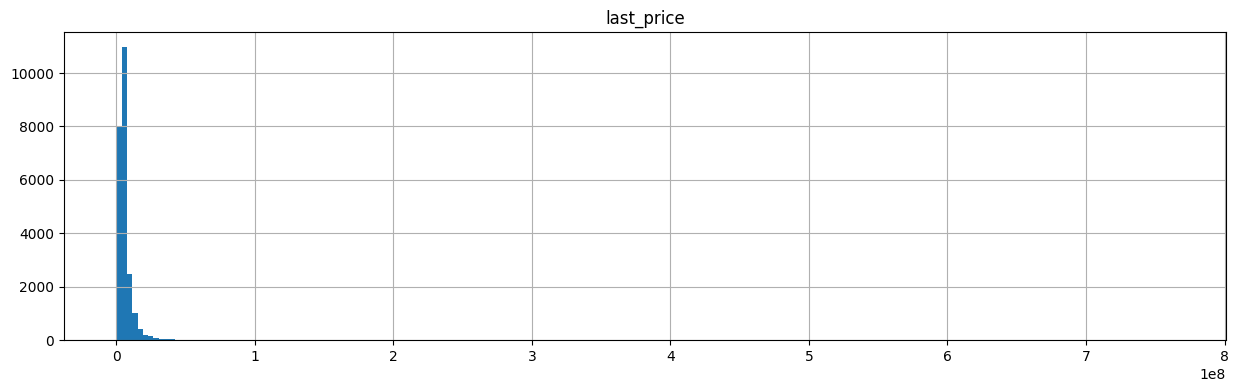

In [41]:
# построим гистограмму для оценки частоты повторения аномальных значений столбца last_price
# для построения будем использовать clean_data с исключенными ранее аномалиями/выбросами
print('Гистограмма для столбца last_price')
clean_data.hist('last_price', bins=200, figsize=(15,4))
plt.show()

По гистограмме видно, что имеются выбросы по максимальному и минимальному значениям. Посмотрим минимальные и максимальные границы.

In [42]:
clean_data['last_price'].describe()

count    2.367300e+04
mean     6.544390e+06
std      1.089213e+07
min      1.219000e+04
25%      3.420000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

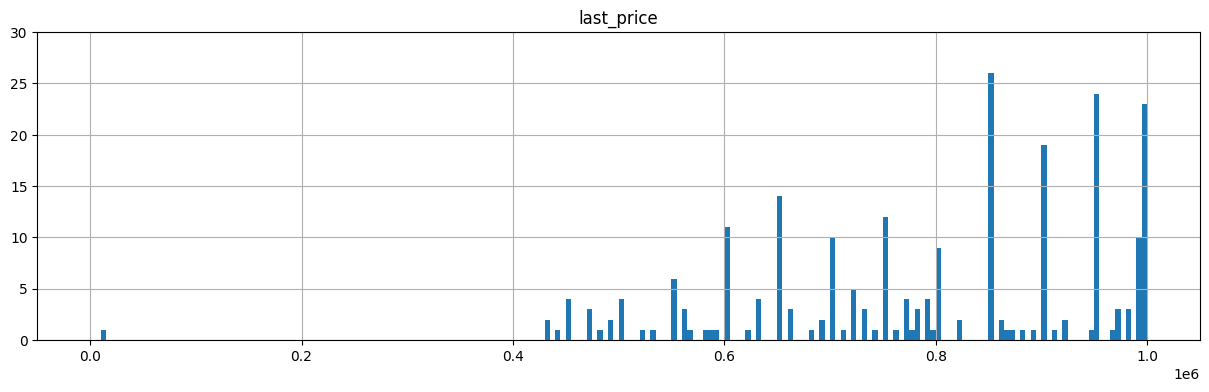

In [43]:
clean_data.hist('last_price', bins=200, range=(0,1000000), figsize=(15,4))
plt.ylim(0, 30)
#plt.xlim(0, 300000000)
plt.show()

По гистограмме видно, что до 600 тыс. руб. значения встречаются очень редко, а стоимость квартиры 12 190 руб., скорее всего, ошибка. Посмотрим минимальное значение подробнее.

In [44]:
clean_data.query('last_price == last_price.min()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,diff_total_area
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8,36.5


Это квартира в Санкт-Петербурге, площадью 109 м. кв. Явно со стоимостью что-то не так, возможно пропустили нули в стоимости. Лучше этот объект убрать из анализа.

Посмотрим к каким населенным пунктам относятся значения менее 600 тыс. и их количество.

In [45]:
print('Количество объектов стоимостью менее 600 тыс. руб.:', clean_data.query('last_price < 600000')['last_price'].count())
clean_data.query('last_price < 600000').groupby('locality_name')['last_price'].agg('count')

Количество объектов стоимостью менее 600 тыс. руб.: 33


locality_name
Бокситогорск              2
Луга                      1
Пикалёво                  2
Санкт-Петербург           1
Сланцы                   13
деревня Бор               1
деревня Вахнова Кара      1
деревня Выскатка          1
деревня Старополье        3
деревня Чудской Бор       1
деревня Ям-Тесово         1
поселок Будогощь          1
поселок Никольский        1
поселок Серебрянский      1
поселок Совхозный         2
поселок станции Свирь     1
Name: last_price, dtype: int64

Единичные значения по разным населенным пунктам, чаще в деревнях и поселках. Их количество не велико, поэтому удаление данных объектов не должно повлиять на результаты анализа.

In [46]:
clean_data = clean_data.query('last_price >= 600000')

Теперь посмотрим насколько часто встречаются значения, близкие к максимальному. Для этого увеличим отрезок от 50 до 800 млн. руб.

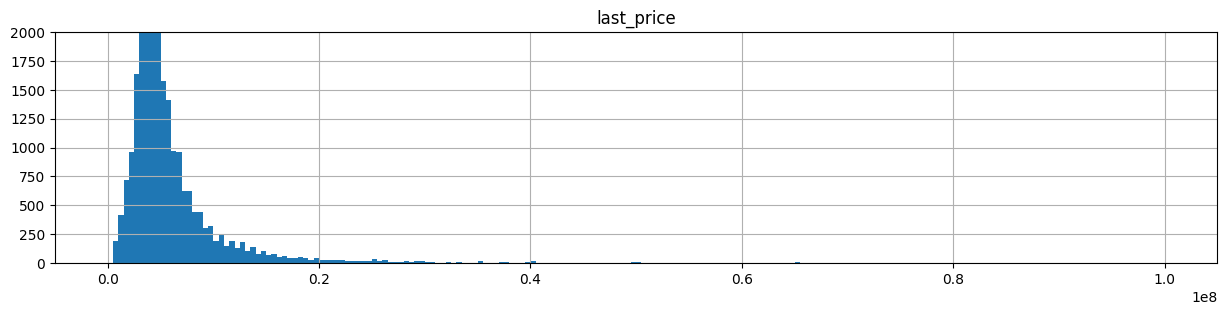

In [47]:
clean_data.hist('last_price', bins=200, range=(0, 100000000), figsize=(15,3))
plt.ylim(0, 2000)
#plt.xlim(50000000, 800000000)
plt.show()

По диаграмме видно, что недвижимость дороже 40 млн. руб. встречается достаточно редко. Посмотрим в каких населенных пунктах находятся эти значения.

In [48]:
clean_data.query('last_price > 40000000').groupby('locality_name')['last_price'].agg('count')

locality_name
Пушкин               1
Санкт-Петербург    181
Name: last_price, dtype: int64

Практически все объекты находятся в Санкт-Петербурге, всего их 182. Так как по Санкт-Петербургу выборка достаточно большая, то можно убрать эту дорогую недвижимость из анализа.

In [49]:
# уберем эти значения из выборки
clean_data = clean_data.query('last_price <= 40000000')
clean_data['last_price'].describe()

count    2.345800e+04
mean     5.922346e+06
std      4.614438e+06
min      6.000000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.000000e+07
Name: last_price, dtype: float64

In [50]:
print('Количество значений в очищенной базе:', clean_data['last_price'].count())

Количество значений в очищенной базе: 23458


#### Поиск аномалий в столбцах area (total_area, living_area, kitchen_area)

Гистограмма для столбца total_area


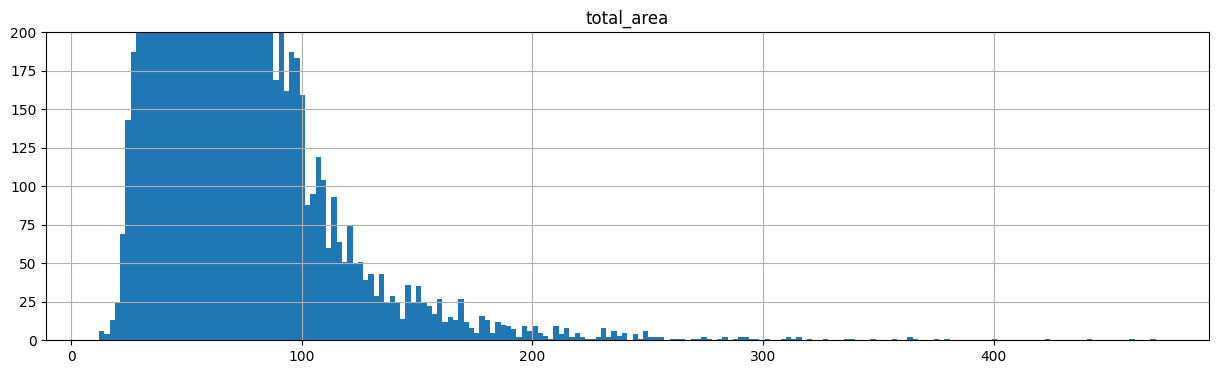

In [51]:
# построим гистограмму для оценки частоты повторения аномальных значений столбца total_area
print('Гистограмма для столбца total_area')
clean_data.hist('total_area', bins=200, figsize=(15,4))
plt.ylim(0, 200)
plt.show()

In [52]:
clean_data['total_area'].describe()

count    23458.00000
mean        58.97522
std         30.07822
min         12.00000
25%         40.00000
50%         52.00000
75%         69.00000
max        470.30000
Name: total_area, dtype: float64

Из гистограммы и предельных значений видно, что общая площадь значительно варьируется. Общая площадь более 200 кв. м. встречается достаточно редко. Оценим количество таких значений.

In [53]:
clean_data.query('total_area > 200')['total_area'].count()

131

In [54]:
# исключим данные значения из очищенных данных
clean_data = clean_data.query('total_area <= 200')

Гистограмма для столбца living_area


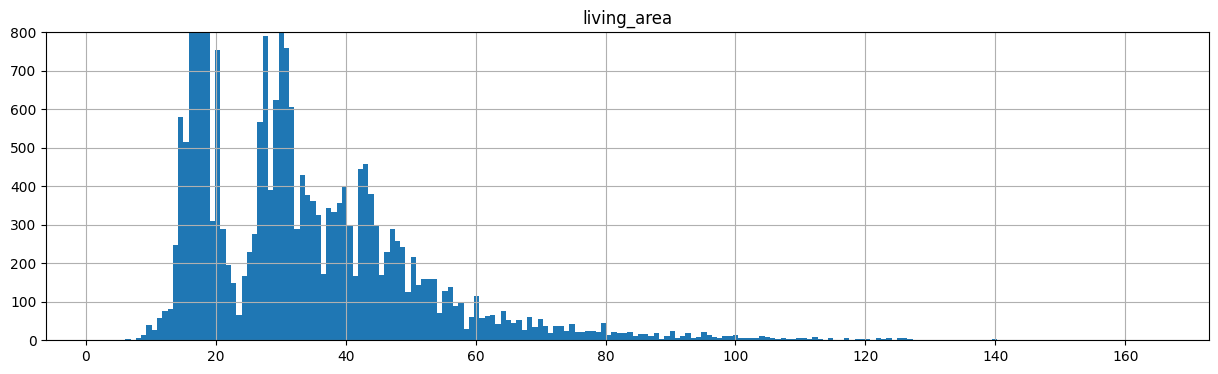

In [55]:
print('Гистограмма для столбца living_area')
clean_data.hist('living_area', bins=200,  figsize=(15,4))
plt.ylim(0, 800)
plt.show()

In [56]:
clean_data['living_area'].describe()

count    23327.000000
mean        33.175860
std         17.268208
min          2.000000
25%         18.605000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

В значениях жилой площади обратим внимание на значения менее 10 кв.м. и более 100 кв. м. Следует посмотреть, какие квартиры туда попали. В случае с аномально маленькой площадью соотнести общую площадь с жилой.

In [57]:
clean_data.query('living_area < 10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,diff_total_area
114,5,4000000.0,21.40,2019-02-07,1,2.90,8,8.300000,7,False,...,0,Санкт-Петербург,27089.0,5791.0,2.0,488.0,1.0,286.0,-999,6.800000
680,14,7200000.0,43.00,2017-10-31,1,NaN,8,9.000000,2,False,...,0,Санкт-Петербург,23900.0,5232.0,1.0,2137.0,1.0,933.0,296,11.000000
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.000000,15,False,...,2,Санкт-Петербург,35555.0,15561.0,0.0,NaN,1.0,1180.0,337,11.000000
1608,12,2150000.0,20.10,2019-01-30,1,NaN,9,9.692055,1,True,...,0,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13,5.492184
2309,10,4200000.0,62.40,2017-06-15,2,2.60,9,8.400000,6,False,...,2,поселок Шушары,23662.0,29448.0,0.0,NaN,0.0,NaN,111,13.000000
3242,7,4440000.0,41.00,2017-07-02,1,NaN,17,3.000000,17,False,...,0,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216,27.000000
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23,9.000000,15,False,...,0,Санкт-Петербург,33626.0,13495.0,0.0,NaN,0.0,NaN,30,8.700000
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.000000,2,False,...,0,Санкт-Петербург,25157.0,4948.0,2.0,349.0,1.0,963.0,9,4.597826
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15,9.000000,4,False,...,0,Санкт-Петербург,50246.0,16444.0,1.0,617.0,0.0,NaN,-999,2.700000
8325,9,4800000.0,52.00,2017-10-25,2,NaN,5,9.000000,2,False,...,1,Санкт-Петербург,33358.0,13171.0,0.0,NaN,2.0,118.0,119,37.000000


Соотношение общей площади квартиры с жилой выглядит не реалистичным. В некоторых случаях возможны опечатки, в части случаев это искусственные значения, которыми заполнялись пропуски. Таких объектов 36, корректнее будет исключить их из анализа.

In [58]:
clean_data = clean_data.query('living_area >= 10')

In [59]:
clean_data.query('living_area > 100')['living_area'].count()

176

In [60]:
clean_data = clean_data.query('living_area <= 100')
clean_data['living_area'].describe()

count    23116.000000
mean        32.589564
std         15.718735
min         10.000000
25%         18.600000
50%         30.000000
75%         41.900000
max        100.000000
Name: living_area, dtype: float64

Гистограмма для столбца kitchen_area


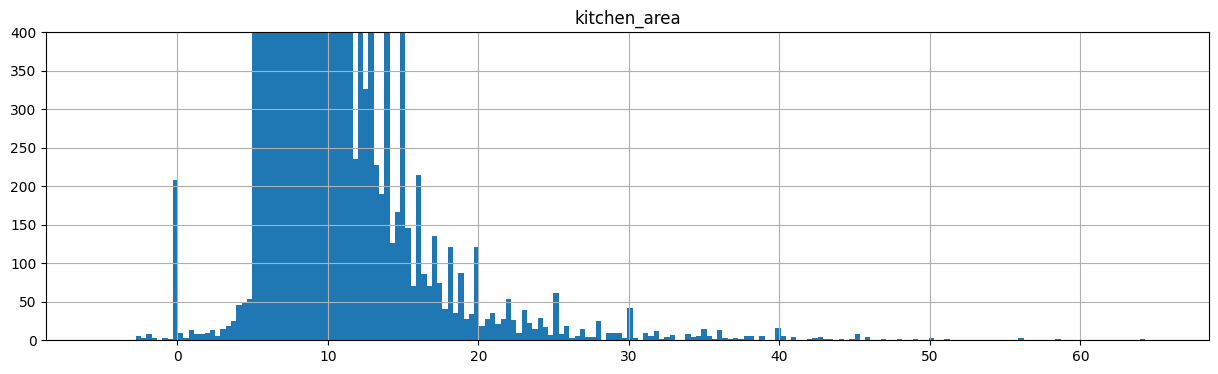

In [61]:
print('Гистограмма для столбца kitchen_area')
clean_data.hist('kitchen_area', bins=200,  figsize=(15,4))
plt.ylim(0, 400)
plt.show()

In [62]:
clean_data['kitchen_area'].describe()

count    23116.000000
mean         9.991061
std          4.934219
min         -5.200000
25%          7.000000
50%          9.000000
75%         11.400000
max         65.000000
Name: kitchen_area, dtype: float64

Из гистограммы и предельных значений видно, что есть отрицательные значения в площади кухни (они появились в результате заполнения пропусков расчетными значениями). Их следует исключить, а также данные о площади кухни менее 5 кв. м. также выглядят не правдоподобными.


В части максимальных значений можно отметить кухни более 60 кв. метров. Следует оценить количество таких данных.

In [63]:
clean_data.query('kitchen_area < 5').groupby('locality_name')['kitchen_area'].agg('count').sort_values(ascending=False)

locality_name
Санкт-Петербург            266
поселок Мурино              49
деревня Кудрово             25
Всеволожск                  13
Никольское                  11
                          ... 
деревня Лесколово            1
деревня Малая Романовка      1
деревня Разбегаево           1
деревня Суоранда             1
поселок станции Корнево      1
Name: kitchen_area, Length: 71, dtype: int64

In [64]:
clean_data.query('kitchen_area > 50').groupby('locality_name')['kitchen_area'].agg('count').sort_values(ascending=False)

locality_name
Санкт-Петербург    14
Пушкин              3
Name: kitchen_area, dtype: int64

In [65]:
# удалим строки с неккоректными значениями
clean_data = clean_data.query('kitchen_area <= 60')
clean_data =clean_data.query('kitchen_area >= 5')

In [66]:
print('Количество значений в очищенной базе:', clean_data['total_area'].count())

Количество значений в очищенной базе: 22595


#### Поиск аномалий в столбце rooms

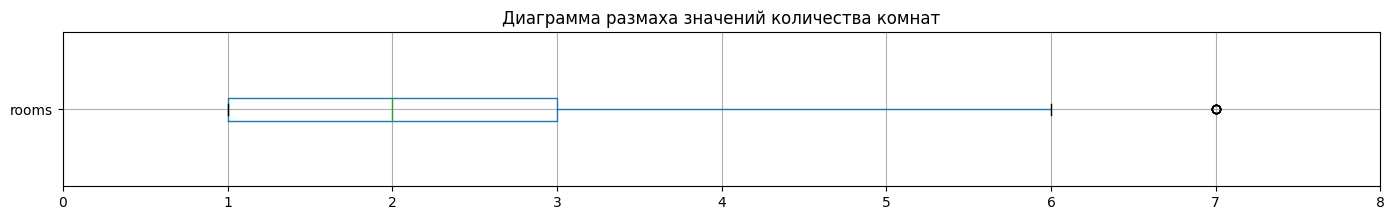

In [67]:
fig, ax = plt.subplots(figsize = (17,2))
ax = clean_data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества комнат')
ax.set_xlim(0, 8);

In [68]:
clean_data.rooms.value_counts().to_frame()

,rooms
2,7816
1,7813
3,5680
4,1064
5,193
6,23
7,6


7 комнатные квартиры встречаются в выборке гораздо реже прочих.

In [69]:
# исключим 7 комнатные квартиры из базы для анализа
clean_data = clean_data.query('rooms <= 6')

#### Поиск аномалий в столбце days_exposition

In [70]:
# посмотрим количество значений-заглушек, которыми были заполнены пропуски
clean_data.query('days_exposition < 0')['days_exposition'].count()

2992

Удаление такого объема объектов нежелательно, поэтому оставим эти значения в базе. 
При расчетах с показателем количества дней размещения объявления отрицательные значения будут исключаться для получения достоверной картины.

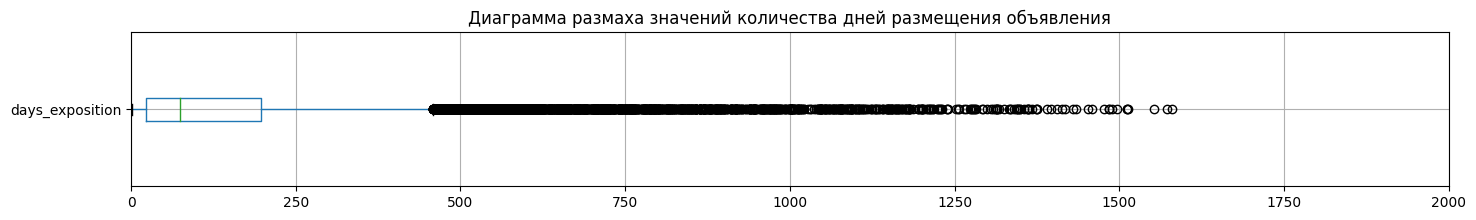

In [71]:
fig, ax = plt.subplots(figsize = (17,2))
ax = clean_data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества дней размещения объявления')
ax.set_xlim(0, 2000);

Из диаграммы видно, что срок размещения объявлений более 1250 дней не является распространенным. Посмотрим количество объектов с подобным сроком.

In [72]:
# рассчитаем количество объектов на исключение
clean_data.query('days_exposition > 1250')['days_exposition'].count()

63

In [73]:
# исключим данные значения из базы
clean_data = clean_data.query('days_exposition <= 1250')

In [74]:
print('Количество значений в очищенной базе:', clean_data['days_exposition'].count())

Количество значений в очищенной базе: 22526


#### Поиск аномалий в столбце floors_total

In [75]:
# посмотрим количество значений-заглушек, которыми были заполнены пропуски
clean_data.query('floors_total < 0')['floors_total'].count()

79

In [76]:
# исключим данные значения из базы
clean_data = clean_data.query('floors_total > 0')

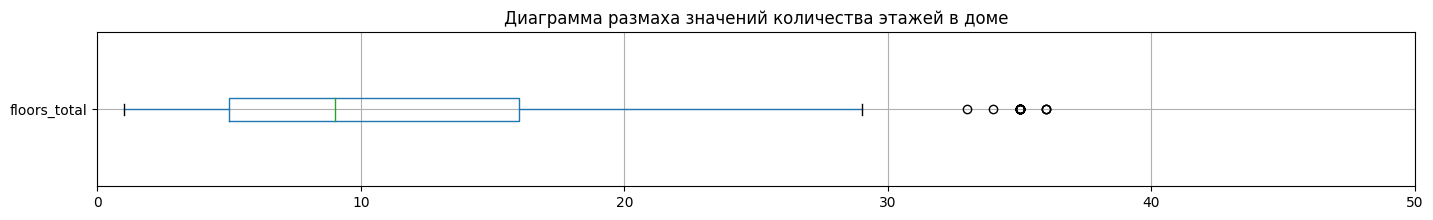

In [77]:
fig, ax = plt.subplots(figsize = (17,2))
ax = clean_data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений количества этажей в доме')
ax.set_xlim(0, 50);

Посчитаем количество объектов с этажами выше границ нормального размаха (дома с более 30-ю этажами).

In [78]:
# рассчитаем количество объектов на исключение
clean_data.query('floors_total > 30')['floors_total'].count()

29

In [79]:
# исключим данные значения из базы
clean_data = clean_data.query('floors_total < 30')

In [80]:
print('Количество значений в очищенной базе:', clean_data['floors_total'].count())

Количество значений в очищенной базе: 22418


#### Итоги корректировки выявленных особенностей в данных

In [81]:
# рассчитаем долю оставшихся данных (строк) в первоначальных данных
print('Количество оставшихся строк в датафрейме:', clean_data.shape[0])
print(f'Процент очищенных данных от первоначального количества: {(clean_data.shape[0]/data.shape[0]) :.0%}')

Количество оставшихся строк в датафрейме: 22418
Процент очищенных данных от первоначального количества: 95%


In [82]:
# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир

(

    clean_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 
                'living_area',  'kitchen_area', 'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,418.00","22,418.00","13,788.00","22,418.00","22,418.00","22,418.00","22,418.00","22,418.00","22,418.00"
min,1.00,20.00,2.40,-999.00,"600,000.00",10.00,5.00,1.00,1.00
max,6.00,200.00,8.30,"1,240.00","40,000,000.00",100.00,58.50,27.00,29.00


Выявленные аномалии в основном связаны с параметрами крупной недвижимости - большой площадью, высокой стоимостью и т.д.
Подобные значения были исключены, так как они не типичны для основной массы данных и значительно влияют на средние значения.


В столбце days_exposition имеются значения-заглушки (2992). Удаление такого объема объектов нежелательно, поэтому оставим эти значения в базе. При расчетах с показателем количества дней размещения объявления отрицательные значения будут исключаться для получения достоверной картины.


Итого в датафрейме осталось 22 418 строк. Процент очищенных данных от первоначального количества составляет 95%.

##  Добавление в таблицу дополнительных расчетных столбцов

In [83]:
# цена одного квадратного метра
clean_data['price_meter'] = round((clean_data['last_price']/clean_data['total_area']),2)

In [84]:
# день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
clean_data['weekday'] = clean_data['first_day_exposition'].dt.weekday

In [85]:
# месяц публикации объявления
clean_data['month'] = pd.DatetimeIndex(clean_data['first_day_exposition']).month

In [86]:
# год публикации объявления
clean_data['year'] = pd.DatetimeIndex(clean_data['first_day_exposition']).year

In [87]:
# определим тип этажа квартиры (значения — «первый», «последний», «другой»)
# так как в floors_total использовалась заглушка для изменения типа значений, то часть объектов будут без определенной категории
def floor_category(row):
    try:
        if row['floor'] == 1:
                return 'первый'
        if row['floors_total'] < 0:
            return 'категория не определена'
        if row['floors_total'] > 0:
            if (row['floors_total'] - row['floor']) == 0:
                return 'последний'
            else:
                return 'другой'
    except:
               'ошибка'

In [88]:
# создадим столбец с указанием категории в зависимости от этажа
clean_data['floor_category'] = clean_data.apply(floor_category, axis=1)

In [89]:
# переведем расстояние до центра города в километры и округлим до целых значений
clean_data['city_centers_nearest_km'] = round((clean_data['city_centers_nearest']/1000),0)

## Исследовательский анализ данных

### Описание типичных значений по различным параметрам объектов недвижимости

#### Общая площадь

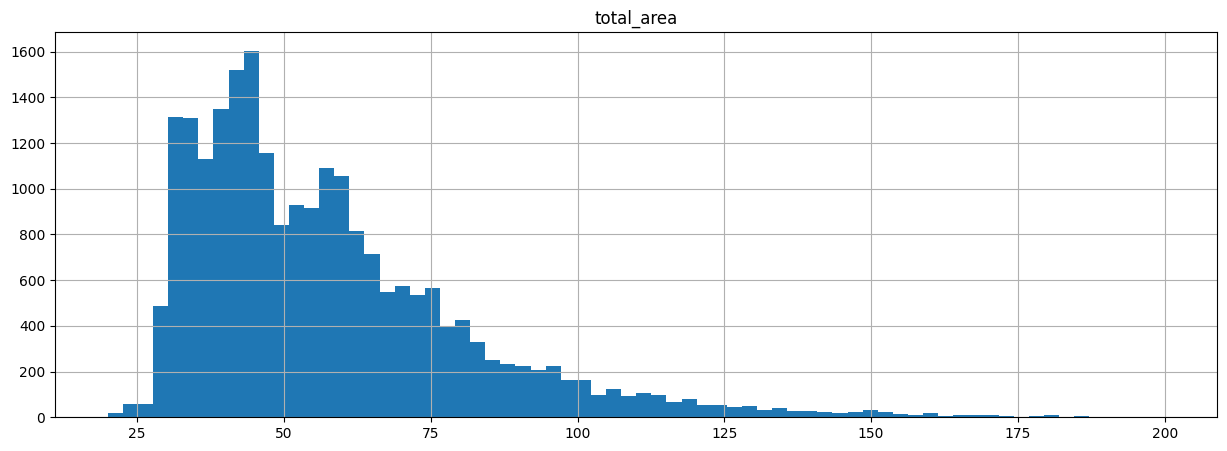

In [90]:
# общая площадь
clean_data.hist('total_area', bins=70, figsize=(15,5))

plt.show()

Диапазон наиболее часто встречающегося размера недвижимости находится в пределах 30-75 кв.м.
Самая распространенная площадь недвижимости около 40 кв.м.

#### Жилая площадь

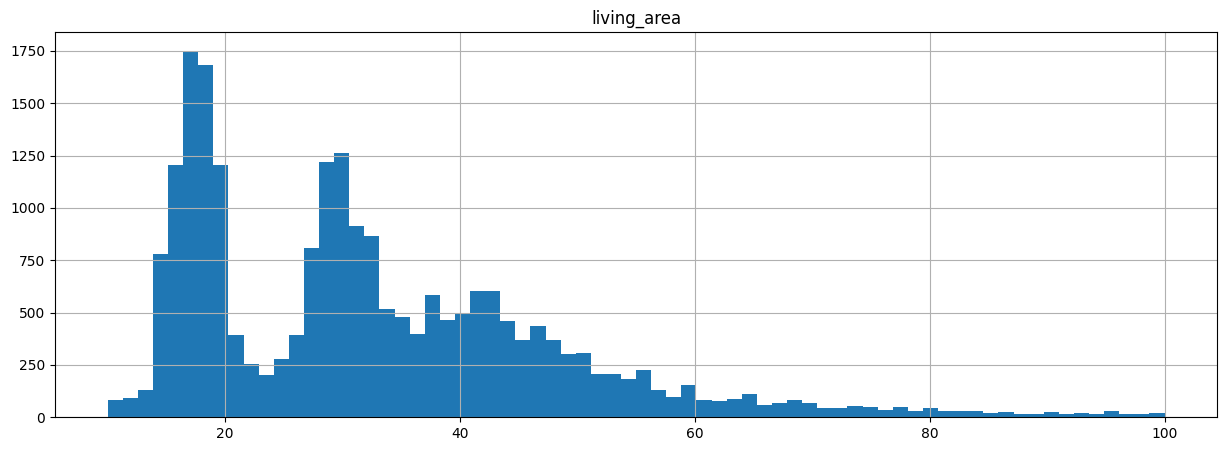

In [91]:
# жилая площадь
clean_data.hist('living_area', bins=70, figsize=(15,5))
plt.show()

Чаще всего встречается жилая площадь размером 12-20 м.кв. и 25-35 м. кв.

#### Площадь кухни

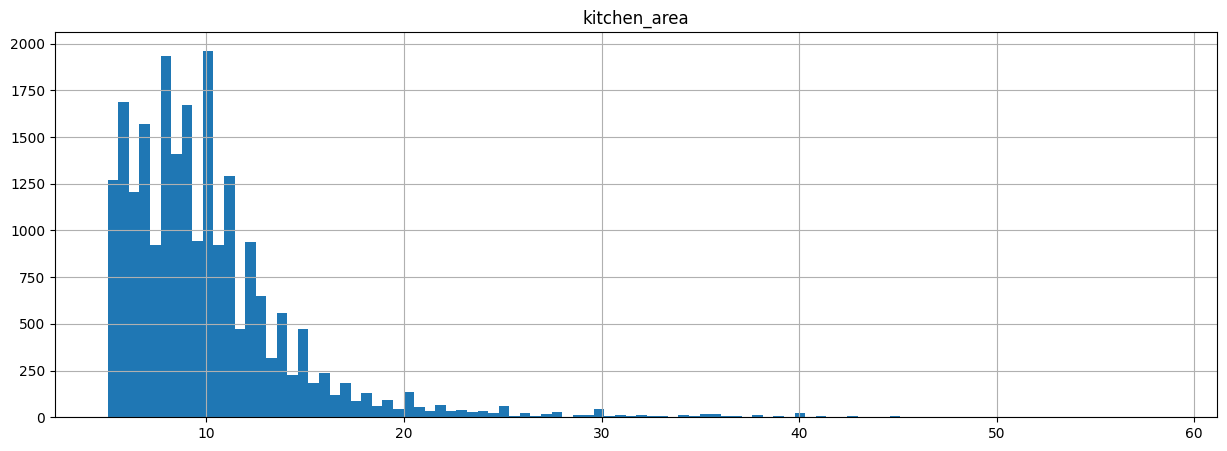

In [92]:
# площадь кухни
clean_data.hist('kitchen_area', bins=100, figsize=(15,5))
plt.show()

Наиболее распространенная площадь кухни варьируется в пределах 6-15 кв.м.

#### Цена объекта

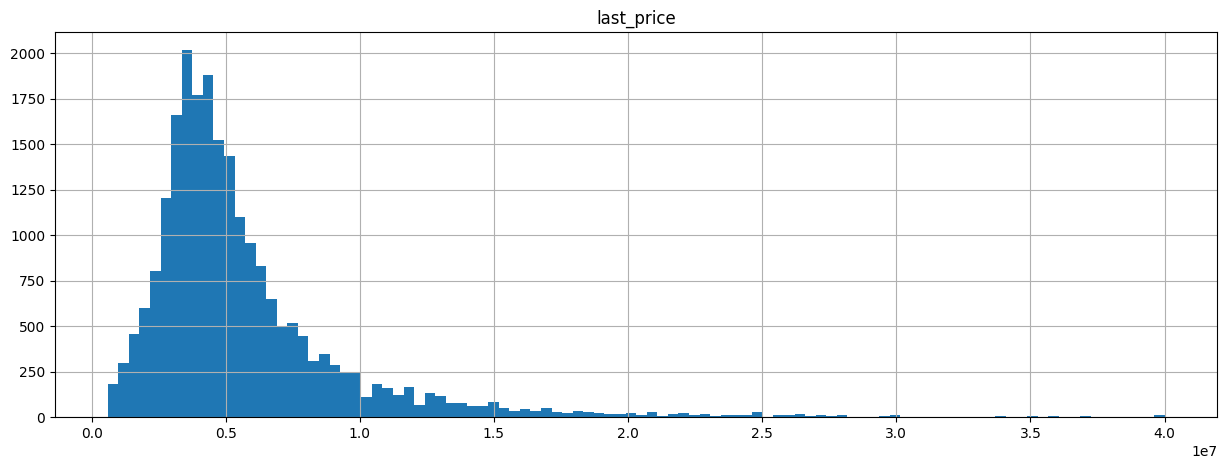

In [93]:
# цена объекта
clean_data.hist('last_price', bins=100, figsize=(15,5))
plt.show()

In [94]:
clean_data['last_price'].describe()

count    2.241800e+04
mean     5.741828e+06
std      4.137254e+06
min      6.000000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      4.000000e+07
Name: last_price, dtype: float64

3-7 млн. руб. самая распространенная стоимость в представленной базе недвижимости.

#### Количество комнат

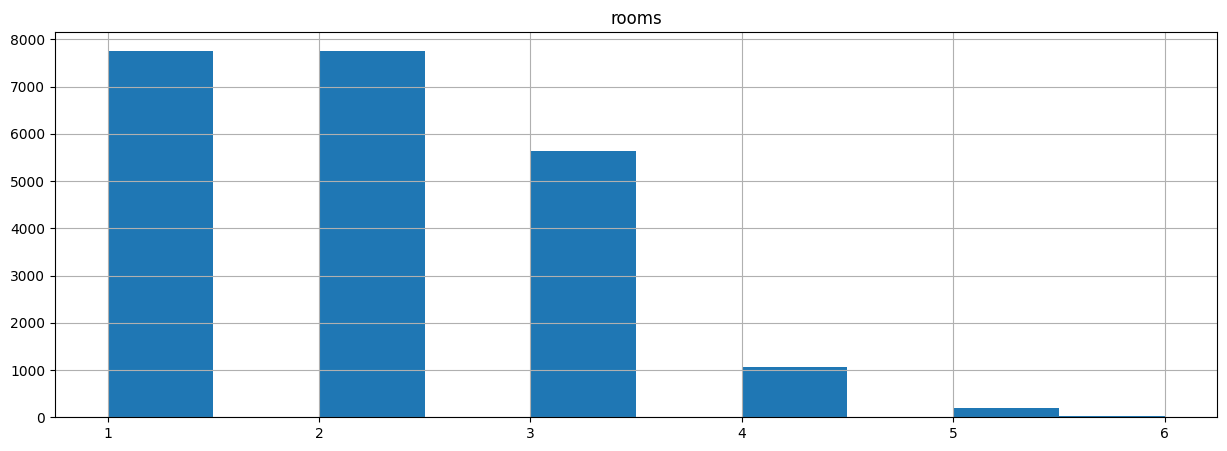

In [95]:
# количество комнат
clean_data.hist('rooms', bins=10, figsize=(15,5))
plt.show()

На продажу выставлялось наибольшее количество однокомнатных и двухкомнатных квартир, с небольшим отставанием трехкомнатные.

#### Высота потолка

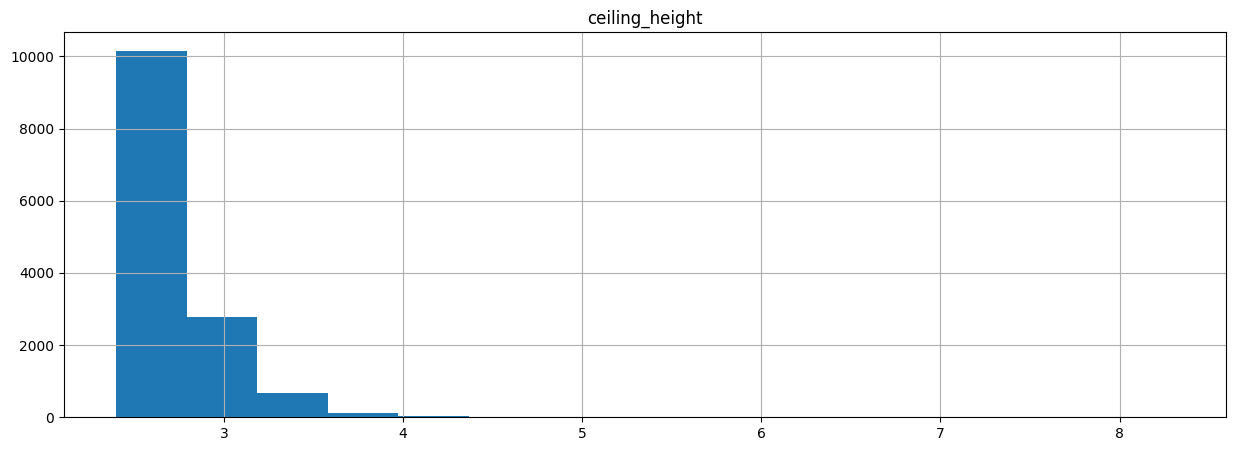

In [96]:
# высота потолков
clean_data.hist('ceiling_height', bins=15, figsize=(15,5))
plt.show()

In [97]:
clean_data['ceiling_height'].describe()

count    13788.000000
mean         2.714529
std          0.270804
min          2.400000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Большая часть значений находятся в диапазоне от 2.5 до 2.8 метров, что похоже на реальные данные о высоте потолков.

#### Этаж квартиры

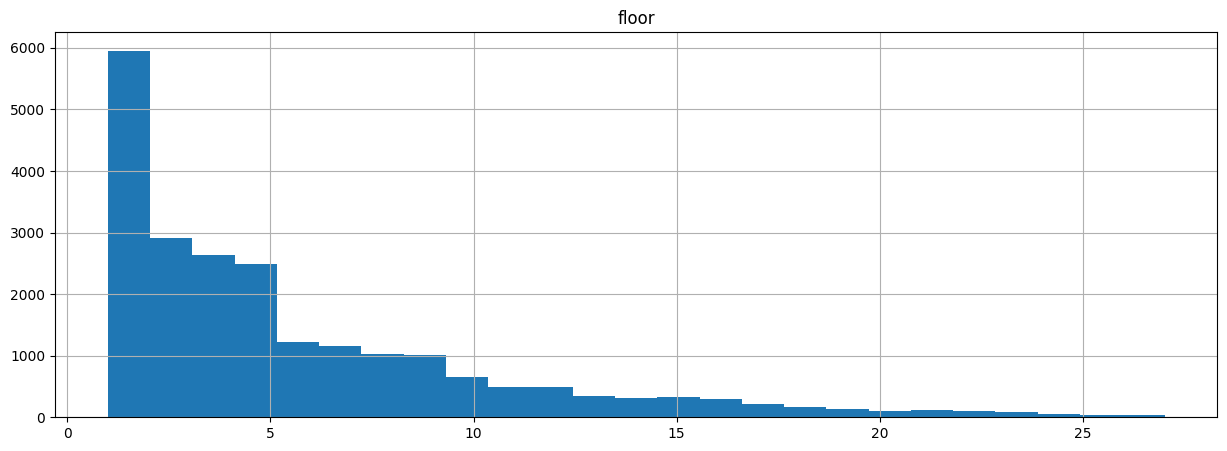

In [98]:
# этаж квартиры
clean_data.hist('floor', bins=25, figsize=(15,5))
plt.show()

Чаще всего на продажу выставлялись квартиры, находящиеся на 1-5 этажах. Также не стоит забывать, о том, что первый этаж отмечен не только у многоквартирных домов, но и у частных домов.

#### Типы этажа квартир

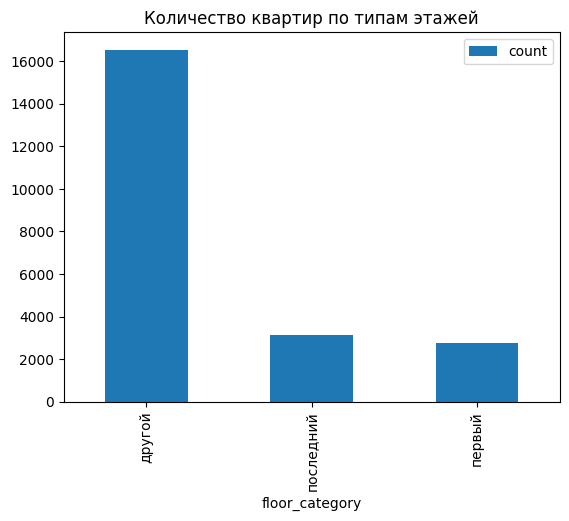

In [99]:
# сгруппируем данные по типу этажа квартиры («первый», «последний», «другой»)
group_floor = clean_data.pivot_table(index='floor_category', values='locality_name', aggfunc='count')
group_floor.columns = ['count']

# рассчитаем долю каждого типа в общем объеме данных
group_floor['share'] = group_floor['count']/group_floor['count'].sum()

# построим гистограмму по количеству недвижимости в зависимости от типа этажей
group_floor.sort_values('count', ascending=False).plot(y='count', kind='bar', title='Количество квартир по типам этажей')
plt.show()


In [100]:
# выведем таблицу с указанием долей для наглядности
group_floor = group_floor.sort_values('share', ascending = False).style.format({'share':'{:.1%}'})
display(group_floor)

,count,share
floor_category,,
другой,16532,73.7%
последний,3117,13.9%
первый,2769,12.4%


Доля квартир на последнем этаже (13,9%) в базе незначительно больше, чем квартир на первом этаже (12,4%). Большая часть недвижимости находится на прочих этажах (73,7%). 

#### Общее количество этажей в доме

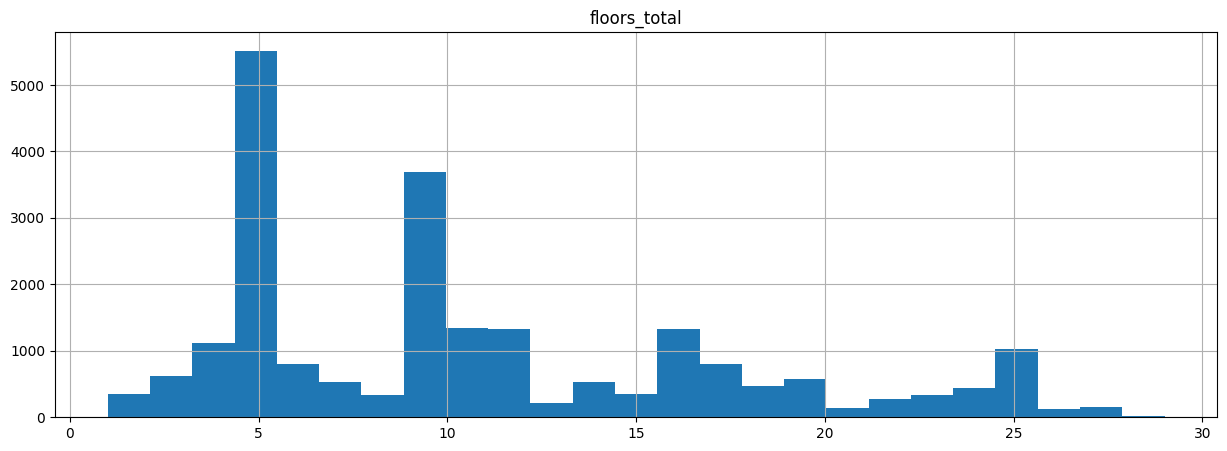

In [101]:
# общее количество этажей в доме
clean_data.query('floors_total > 0').hist('floors_total', bins=25, figsize=(15,5))
plt.show()

Чаще всего недвижимость продают в домах с 5-ю и 9-ю этажами. Что похоже на реальную картину - это этажность типовых многоквартирных застроек.

Также выделяются 10-13 дома и 16 этажные. Скорее всего, квартиры в новостройках.

#### Расстояние до центра города в метрах

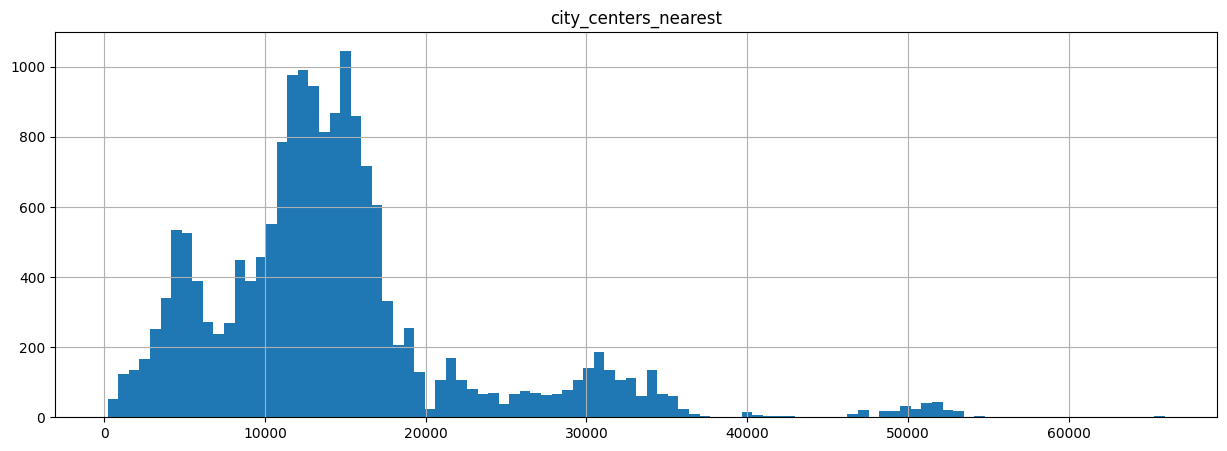

Доля объектов из базы, расположенных в радиусе 20 км от центра города 51.0%


In [102]:
# расстояние до центра города в метрах
clean_data.hist('city_centers_nearest', bins=100, figsize=(15,5))
plt.show()

# рассчитаем количество объектов с диапазоном 8000-20000 м от центра
city_centers_nearest_count = clean_data.query('city_centers_nearest >=8000 and city_centers_nearest <=20000')\
['city_centers_nearest'].count()
# рассчитаем долю таких объектов в общем объеме очищенной базы
city_centers_nearest_share = city_centers_nearest_count/clean_data.shape[0]
print(f'Доля объектов из базы, расположенных в радиусе 20 км от центра города {city_centers_nearest_share:.1%}')

Половина объектов недвижимости находится близко к центру города (51%).
Стоит также учитывать размер населенного пункта - для крупного города близость центра будет преимуществом, а для небольшого населенного пункта это не будет особенно важным.

#### Расстояние до ближайшего аэропорта

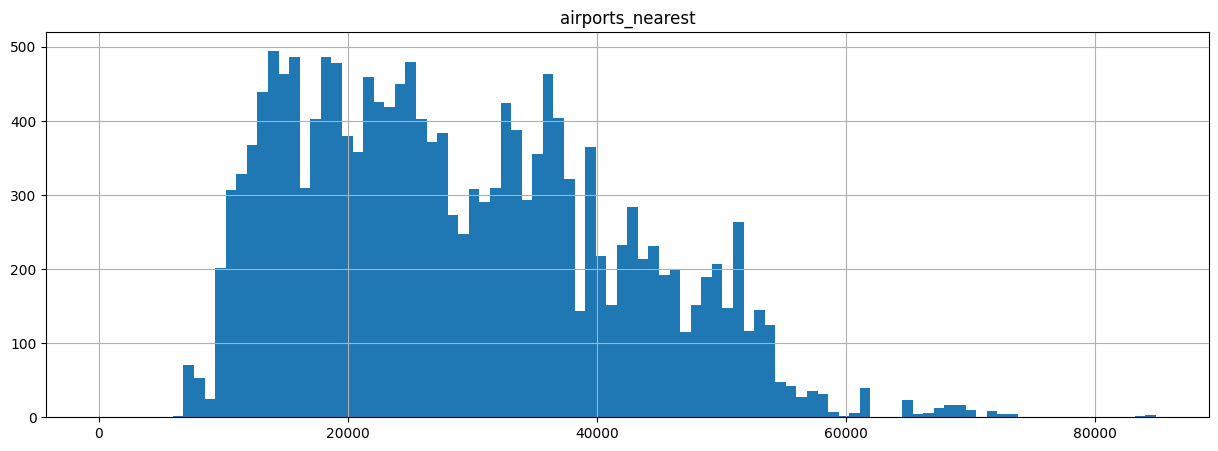

Доля объектов из базы, расположенных вблизи 10-40 км. от аэропорта 59.8%


In [103]:
# расстояние до ближайшего аэропорта
clean_data.hist('airports_nearest', bins=100, figsize=(15,5))
plt.show()

# рассчитаем количество объектов с диапазоном 10-40 км от аэропорта
airports_nearest_count = clean_data.query('airports_nearest >=10000 and airports_nearest <=40000')['airports_nearest'].count()
# рассчитаем долю таких объектов в общем объеме очищенной базы
airports_nearest_share = airports_nearest_count/clean_data.shape[0]
print(f'Доля объектов из базы, расположенных вблизи 10-40 км. от аэропорта {airports_nearest_share:.1%}')

Расположение недвижимости в относительной близи от аэропорта может быть преимуществом в крупных городах, если владелец часто пользуется авиатранспортом.

Слишком близкое расположение к аэропорту не желательно, так как будет слышен шум двигателей самолета.

#### Расстояние до ближайшего парка

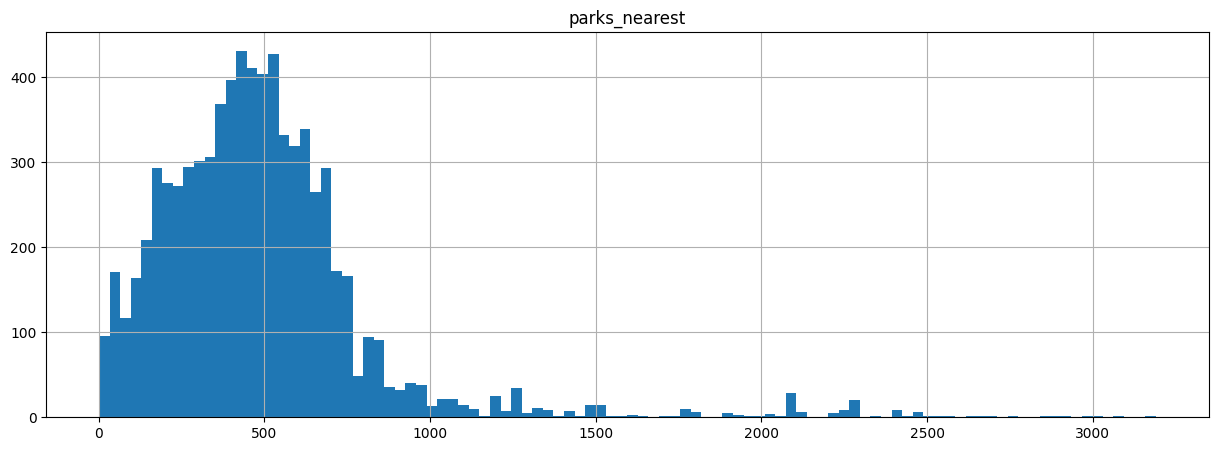

Доля объектов из базы, расположенных вблизи парка 28.8%


In [104]:
# расстояние до ближайшего парка
clean_data.hist('parks_nearest', bins=100, figsize=(15,5))
plt.show()

# рассчитаем количество объектов с расстоянием до ближайшего парка менее 700 м.
parks_nearest_count = clean_data.query('parks_nearest <=700')['parks_nearest'].count()
# рассчитаем долю таких объектов в общем объеме очищенной базы
parks_nearest_share = parks_nearest_count/clean_data.shape[0]
print(f'Доля объектов из базы, расположенных вблизи парка {parks_nearest_share:.1%}')

Данный фактор может быть важен молодым семьям с детьми, а также людям пожилого возраста. Для них доступность прогулок в парке недалеко от дома будет являться преимуществом.

#### День и месяц публикации объявления

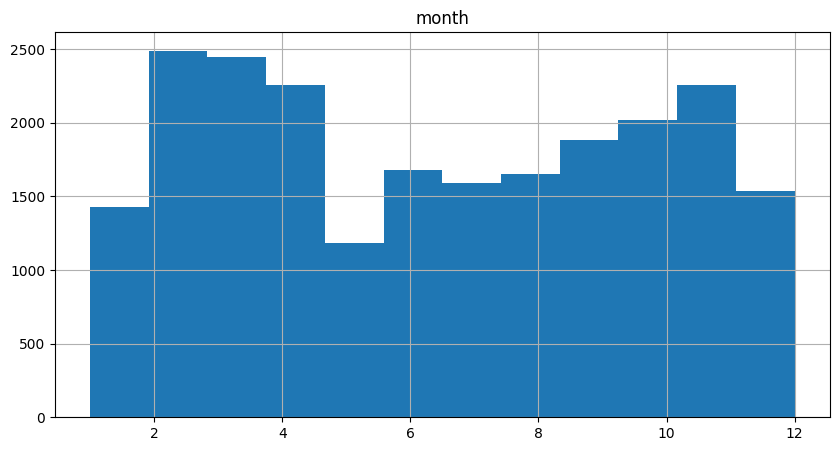

In [105]:
# месяц публикации объявления
clean_data.hist('month', bins=12, figsize=(10,5))
plt.show()

Чаще всего объявления публикуются в феврале-марте и октябре-ноябре. Спад активности наблюдается в мае.

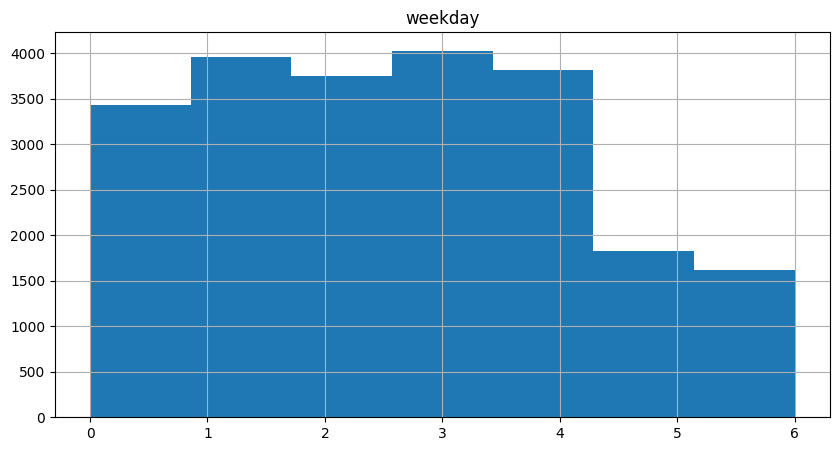

In [106]:
# день публикации объявления 
clean_data.hist('weekday', bins=7, figsize=(10,5))
plt.show()

В течение рабочей недели активность в целом равномерная с незначительным ростом по вторникам и четвергам. Самая низкая активность по размещению объявлений наблюдается в выходные дни.

### Оценка сроков продажи квартир

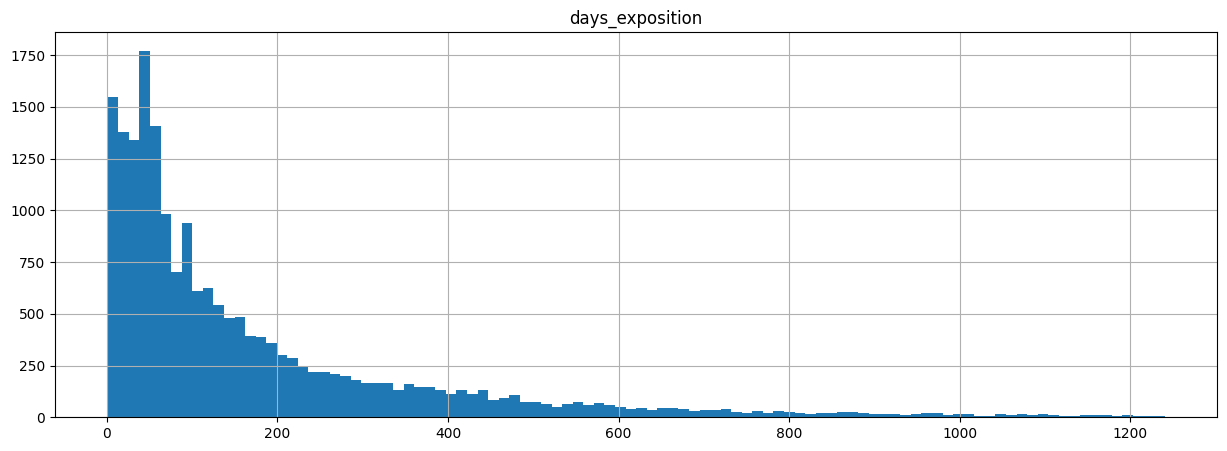

Числовое описание данных для столбца days_exposition


count    19442.000000
mean       175.807324
std        207.859168
min          1.000000
25%         45.000000
50%         95.000000
75%        227.000000
max       1240.000000
Name: days_exposition, dtype: float64

In [107]:
# построим гистограмму по столбцу days_exposition с исключение значений-заглушек по еще не проданным объектам
clean_data.query('days_exposition > 0').hist('days_exposition', bins=100, figsize=(15,5))
plt.show()

print('Числовое описание данных для столбца days_exposition')
display(clean_data[clean_data['days_exposition'] > 0]['days_exposition'].describe())

Среднее значение сроков продажи отличается от медианы почти в 2 раза, что подтверждается также достаточно большим стандартным отклонением (208 дня - это отклонения более чем на 6 месяцев). 
Значение медианы (95 дней) отклонено к первому квартилю (45 дней). 


Таким образом, можно сказать что обычно продажа недвижимости занимает порядка 3 месяцев. 

При этом быстрой продажей можно считать сроки до 45 дней (1,5 месяцев), а необычно долгими свыше 227 дней (7-8 месяцев).  

### Факторы, влияющие на общую стоимость объекта

#### Оценка влияния количественных параметров на стоимость недвижимости

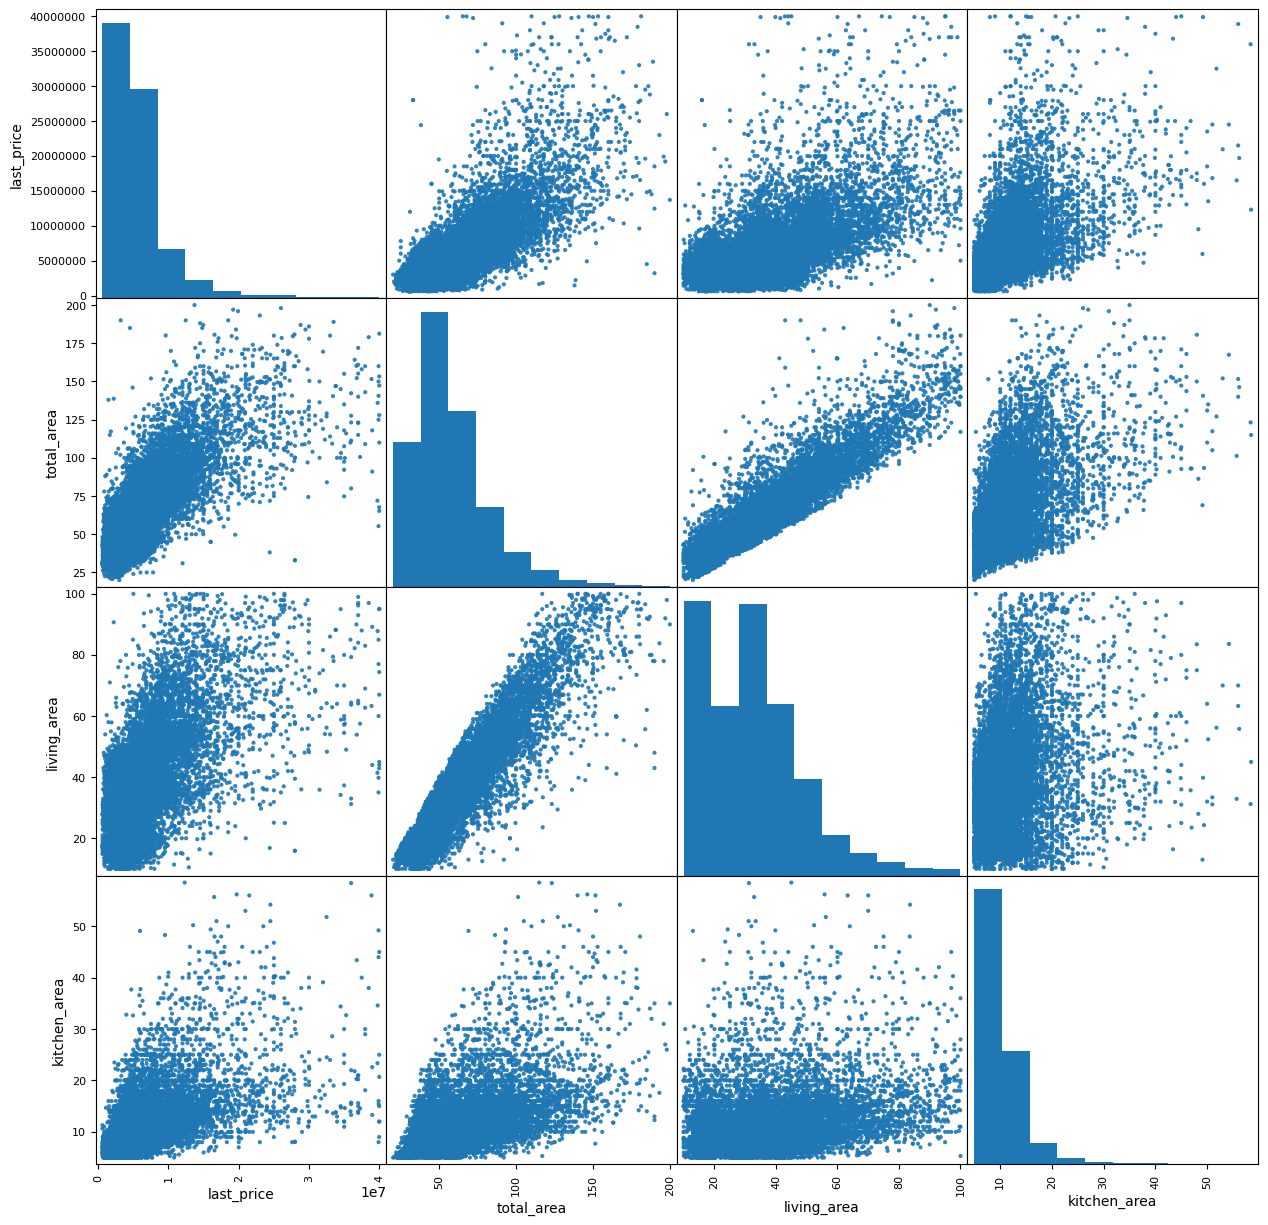

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.758730,0.643053,0.594528
total_area,0.758730,1.000000,0.924906,0.568913
living_area,0.643053,0.924906,1.000000,0.315527
kitchen_area,0.594528,0.568913,0.315527,1.000000


In [108]:
# построим диаграмму рассеивания для необходимых параметров
pd.plotting.scatter_matrix(clean_data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area']], alpha=0.9,  figsize=(15,15))
plt.show()

# найдем коэффициент корреляции
display(clean_data.loc[:,['last_price', 'total_area', 'living_area', 'kitchen_area']].corr())

**Выводы:**
1. Наблюдается линейная положительная связь между ценой объекта и его общей площадью (коэф. корреляции равен 0,76) - чем больше площадь, тем выше цена.
2. Положительная зависимость стоимости от жилой площади и площади кухни (коэф. корреляции равен 0,64 и 0,59 соответственно) менее выражена, но существует по части объектов.

#### Оценка влияния категориальных параметров на стоимость недвижимости

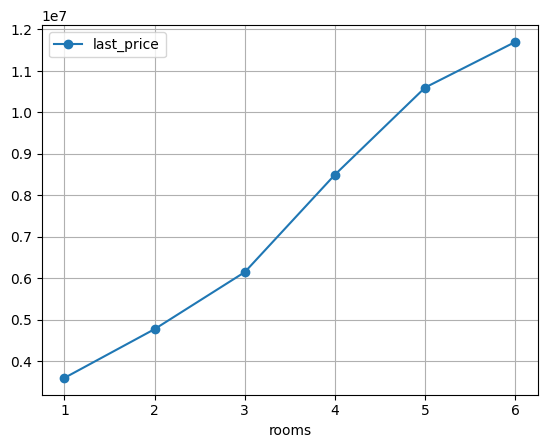

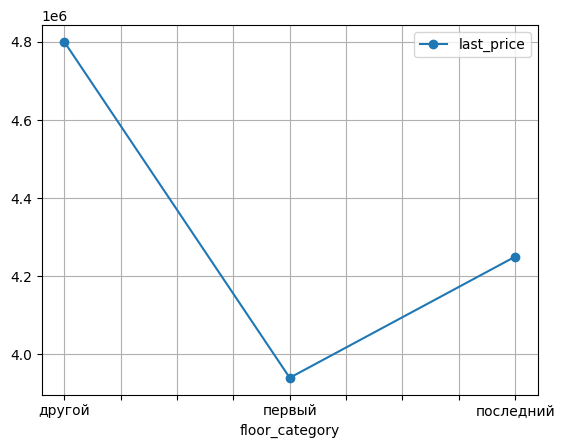

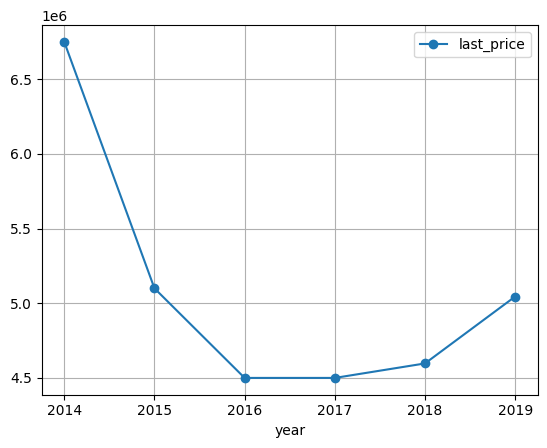

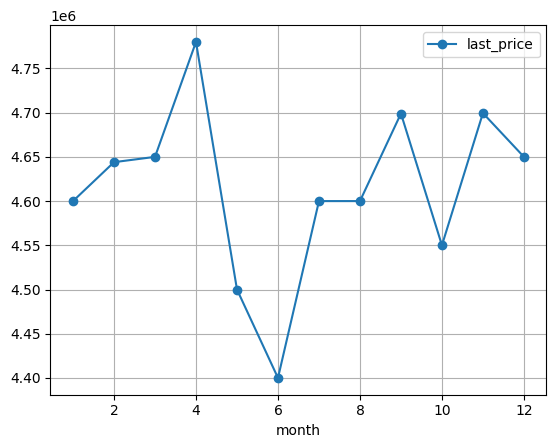

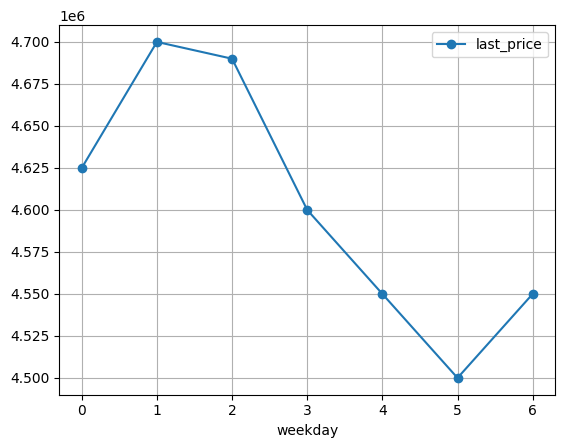

In [109]:
# сгруппируем данные по категориям с расчетом медианы стоимости объекта и построим графики
categories = ['rooms', 'floor_category', 'year', 'month', 'weekday']
for category in categories:
    group = 0
    group = clean_data.pivot_table(index=category, values='last_price', aggfunc='median')
    group.columns = ['last_price']
    group.plot(style='o-', grid=True)
    plt.show()

**Выводы:**
1. Наблюдается положительная зависимость между количеством комнат в квартирах и стоимостью.
2. Квартиры на первом и последнем этаже стоят значительно дешевле, чем на других этажах.
3. С 2014 по 2019 гг. наблюдалась следующая динамика стоимости на недвижимость:
   - максимальная цена на недвижимость отмечена в 2014 году;
   - с 2016 по 2017 гг. наблюдался период снижения стоимости на недвижимость;
   - в 2018-2019 гг. наблюдается незначительный рост цен на недвижимость.
4. В разрезе месяцев года самая высокая стоимость наблюдается в апреле, а самая низкая - в июне. Однако в абсолютном выражении эти колебания несущественны. В остальные месяцы цена недвижимости относительно стабильная.   
5. В зависимости от дня недели наблюдаются следующие колебания стоимости:
   - во вторник и среду цена максимальная;
   - с четверга снижается, и минимальная стоимость наблюдается по субботам.

### Оценка средней цены за 1 кв.м. в ТОП-10 населенных пунктов по количеству объявлений

In [110]:
# определим ТОП-10 населенных пунктов по количеству объявлений
locality_name_group = clean_data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count')
locality_name_group.columns = ['ads_count']
locality_name_group_top10 = locality_name_group.sort_values('ads_count', ascending=False).head(10)

# расчет средней стоимости квадратного метра по населенным пунктам
locality_name_price = clean_data.pivot_table(index='locality_name', values='price_meter', aggfunc='sum') 
locality_name_price.columns = ['ads_sum']

# объединим данные в одну таблицу
final_locality_name_top10 = locality_name_group_top10.join(locality_name_price)

# рассчитаем среднюю цену одного квадратного метра по ТОП-10
final_locality_name_top10['price_one_meter'] = (
    round((final_locality_name_top10['ads_sum']/final_locality_name_top10['ads_count']), 2))

Санкт-Петербург - населенный пункт с максимальной средней стоимостью квадратного метра: 111353.28 руб.
Выборг - населенный пункт с минимальной средней стоимостью квадратного метра: 58101.86 руб.


,ads_count,ads_sum,price_one_meter
locality_name,,,
Санкт-Петербург,14799,1.647917e+09,111353.28
Пушкин,354,3.646507e+07,103008.66
деревня Кудрово,274,2.525030e+07,92154.38
поселок Парголово,319,2.880700e+07,90304.08
поселок Мурино,502,4.247212e+07,84605.81
поселок Шушары,431,3.370793e+07,78208.66
Колпино,335,2.526313e+07,75412.33
Гатчина,297,2.045112e+07,68858.98
Всеволожск,383,2.630361e+07,68677.84


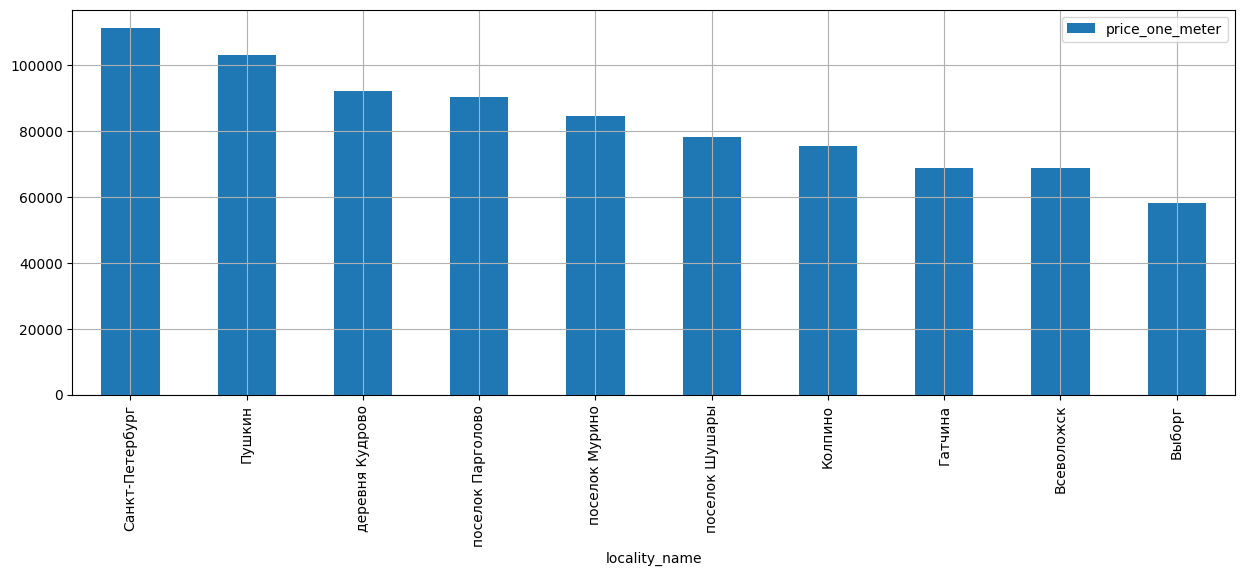

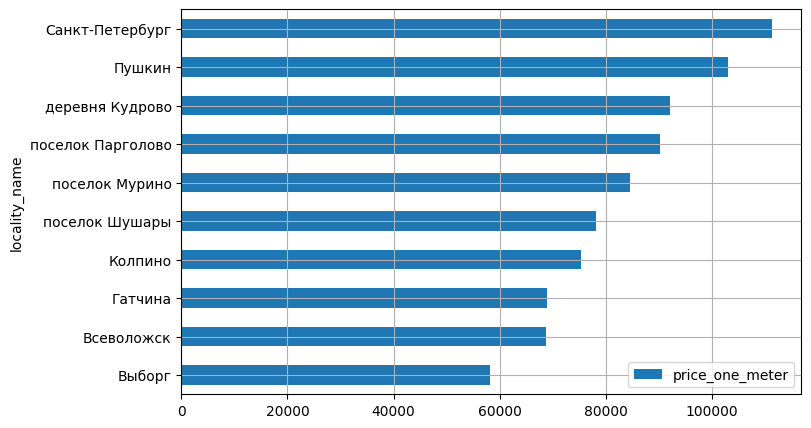

In [111]:
# определим максимальную и минимальную стоимость квадратного метра среди ТОП-10 населенных пунктов
final_locality_name_top10_max = final_locality_name_top10['price_one_meter'].max()
final_locality_name_top10_min = final_locality_name_top10['price_one_meter'].min()
final_locality_name_top10_max_name = (
    final_locality_name_top10.query('price_one_meter == price_one_meter.max()')['price_one_meter'].index[0]
)
final_locality_name_top10_min_name = (
    final_locality_name_top10.query('price_one_meter == price_one_meter.min()')['price_one_meter'].index[0]
)
print(final_locality_name_top10_max_name, '- населенный пункт с максимальной средней стоимостью квадратного метра:', 
      final_locality_name_top10_max, 'руб.')

print(final_locality_name_top10_min_name, '- населенный пункт с минимальной средней стоимостью квадратного метра:', 
      final_locality_name_top10_min, 'руб.')

# построим гистограмму по ТОП-10 населенным пунктам
display(final_locality_name_top10.sort_values('price_one_meter', ascending=False))
(
    final_locality_name_top10.sort_values('price_one_meter', ascending=False)
    .plot(y='price_one_meter', kind='bar', grid=True, figsize=(15,5))
)
plt.show()

(
    final_locality_name_top10.sort_values('price_one_meter', ascending=True)
    .plot(y='price_one_meter', kind='barh', grid=True, figsize=(8,5))
)
plt.show()

### Зависимость стоимости объектов от расстояния до центра города

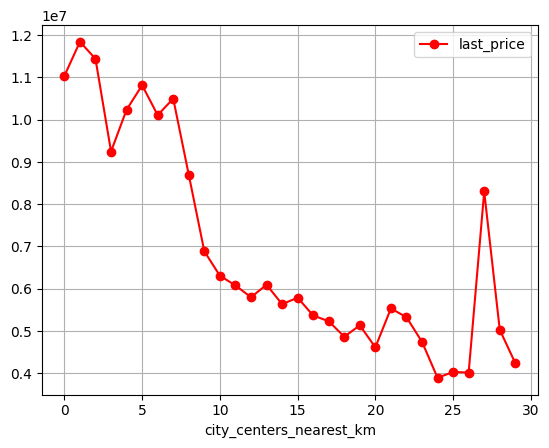

In [112]:
# построим график средней стоимости недвижимости в зависимости от удаленности от центра
city_centers_nearest_km_price = clean_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')

city_centers_nearest_km_price.plot(style='o-', grid=True, color='r')
plt.show()

Между стоимостью недвижимости и расстоянием от центра города наблюдается отрицательная зависимость - чем меньше расстояние от центра, тем выше стоимость квартиры. Такой результат был ожидаемым.
Стоит обратить внимание на резкое понижение средней стоимости на 27 км. Посмотрим количество недвижимости на каждом км, чтобы оценить достаточность выборки.

In [113]:
# построим сводную таблицу по количеству объектов на каждом километре
city_centers_nearest_km_count = (
    clean_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='count')
)

# посмотрим количество объектов, попавших в расчет среднего, начиная с 20 км.
city_centers_nearest_km_count.tail(10)

,last_price
city_centers_nearest_km,
20.0,19
21.0,114
22.0,198
23.0,81
24.0,25
25.0,24
26.0,43
27.0,2
28.0,7


Как и ожидалось, на 27 км выборка равна двум. Репрезентативность данных при количестве объектов в каждом км менее 100 можно поставить под сомнение.

Для более корректной оценки можно выделить три группы расстояний до центра: в радиусе до 10 км, от 10 до 20 км и дальше 20 км.

In [114]:
# создадим функцию для определения категории
def city_centers_nearest_category(row):
    try:
        if row['city_centers_nearest_km'] <= 10:
            return 'радиус до 10 км'
        elif row['city_centers_nearest_km']  > 10 and row['city_centers_nearest_km']  <= 20:
            return 'радиус от 10 до 20 км'
        elif row['city_centers_nearest_km']  > 20:
            return 'радиус свыше 20 км'
        else:
            return 'категория не определена'
    except:
               'ошибка'

In [115]:
# создадим столбец для указания группы расстояния
clean_data['city_centers_nearest_km_category'] = clean_data.apply(city_centers_nearest_category, axis=1)

In [116]:
# построим сводную таблицу по количеству объектов в каждой группе
# предварительно исключим значения, где группа не определена ввиду отсутствия данных о расстоянии
city_centers_nearest_km_group = (
    clean_data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km_category', values='last_price', aggfunc=['count', 'mean'])
)
city_centers_nearest_km_group.columns = ['count', 'mean_price']
display(city_centers_nearest_km_group.query('city_centers_nearest_km_category != "категория не определена"'))

,count,mean_price
city_centers_nearest_km_category,,
радиус до 10 км,4881,9.255896e+06
радиус от 10 до 20 км,9367,5.705804e+06
радиус свыше 20 км,500,5.025294e+06


Теперь выборка по группе 'радиус свыше 20 км' является более репрезентативной. 

**Выводы:**
- Между стоимостью недвижимости и расстоянием от центра города наблюдается отрицательная зависимость - чем меньше расстояние от центра, тем выше стоимость квартиры.


- Средняя стоимость недвижимости в Санкт-Петербурге в зависимости от расстояния до центра города:
  - в радиусе до 10 км от центра города: 9 255 896 руб. (4881 объект недвижимости)
  - в радиусе от 10 до 20 км: 5 705 804 руб. (9367 объектов)
  - в радиусе свыше 20 км: 5 025 294 руб. (500 объектов)

## Общий вывод

Опишите полученные результаты и зафиксируйте основной вывод проведённого исследования.

**С целью подготовки данных к анализу была проведена предобработка данных:**
- заполнены пропуски данных, где это было возможно;
- изменены типы данных для упрощения работы по категоризации, группировке и т.д.
- выявлены  и исключены аномалии, которые в основном с параметрами крупной недвижимости - большой площадью, высокой стоимостью и т.д.
После этапа предобработки данных в датафрейме осталось 22 418 строк. 

**Процент очищенных данных от первоначального количества составляет 95%.**

**Наиболее распространенные параметры недвижимости в анализируемой базе:**
- **Размер недвижимости** находится в пределах 30-75 кв.м. Самая распространенная площадь недвижимости около 40 кв.м.


- Наиболее часто встречающаяся **жилая площадь** в пределах 12-20 м.кв. и 25-35 м.кв.


- Наиболее распространенная **площадь кухни** варьируется в пределах 6-15 кв.м.


- **Общая стоимость** недвижимости в представленной базе чаще всего варьируется в пределах 3-7 млн. руб.


- По **числу комнат** наибольшее количество выставленных на продажу квартир были однокомнатными и двухкомнатными, с небольшим отставанием трехкомнатные.


- **Высота потолков** в анализируемой базе варьируется в диапазоне от 2.5 до 2.8 метров.


- Чаще всего на продажу выставлялась недвижимость, находящаяся на **1-5 этажах в домах с 5-ю и 9-ю этажами.**


- Половина объектов недвижимости расположена в радиусе 20 км **от центра города** - доля объектов в базе 51% (из тех, по кому данная информация имелась). Чтобы эта информация носила прикладной характер необходимо смотреть расстояния по конкретному населенному пункту, так как для крупного города расстояние 20 км. от центра будет преимуществом, а для небольшого населенного пункта это не будет особенно важным.


- Доля объектов из базы, расположенных **вблизи 10-40 км. от аэропорта** 59,8%. Расположение недвижимости в относительной близи от аэропорта может быть преимуществом в крупных городах, если владелец часто пользуется авиатранспортом.


- Доля объектов из базы, расположенных **вблизи парка** 28.8%. Данный фактор может быть важен молодым семьям с детьми, а также людям пожилого возраста. Для них доступность прогулок в парке недалеко от дома будет являться преимуществом.


- По итогам анализа дат публикации объявлений выявлено следующее:
   - чаще всего объявления публикуются в феврале-марте и октябре-ноябре. Спад активности наблюдается в мае.
   - в течение рабочей недели активность в целом равномерная с незначительным ростом по вторникам и четвергам. Самая низкая активность по размещению объявлений наблюдается в выходные дни.
   
   
- По результатам оценки сроков продажи недвижимости можно отметить:
   - типичный срок продажи недвижимости занимает порядка 3 месяцев;
   - быстрой продажей можно считать сроки до 45 дней (1,5 месяцев), а необычно долгими свыше 227 дней (7-8 месяцев).


**Факторы, влияющие на общую стоимость объекта:**
1. Наблюдается линейная **положительная связь между ценой объекта и его общей площадью** (коэф. корреляции равен 0,76) - чем больше площадь, тем выше цена. Положительная зависимость стоимости от жилой площади и площади кухни (коэф. корреляции равен 0,64 и 0,59 соответственно) менее выражена, но существует по части объектов.


2. Наблюдается **положительная зависимость между количеством комнат в квартирах и стоимостью.**


3. Квартиры на первом и последнем этаже стоят значительно дешевле, чем на других этажах.

**Итоги анализа зависимости стоимости от временных диапазонов:**
- С 2014 по 2019 гг. наблюдалась следующая динамика стоимости на недвижимость:
  - максимальная цена на недвижимость отмечена в 2014 году;
  - с 2016 по 2017 гг. наблюдался период снижения стоимости на недвижимость;
  - в 2018-2019 гг. наблюдается незначительный рост цен на недвижимость.
- В разрезе месяцев года самая высокая стоимость наблюдается в апреле, а самая низкая - в июне. В остальные месяцы цена недвижимости относительно стабильная.
- В зависимости от дня недели наблюдаются следующие колебания стоимости:
  - во вторник и среду цена максимальная;
  - с четверга снижается, и минимальная стоимость наблюдается по субботам.

По результатам оценки **средней цены за 1 кв.м. в ТОП-10 населенных пунктов по количеству объявлений** были выделены:
- Санкт-Петербург - населенный пункт с максимальной средней стоимостью квадратного метра: 111353.28 руб.
- Выборг - населенный пункт с минимальной средней стоимостью квадратного метра: 58101.86 руб.

**Оценка зависимости стоимости объектов от расстояния до центра города:**
- Между стоимостью недвижимости и расстоянием от центра города наблюдается отрицательная зависимость - чем меньше расстояние от центра, тем выше стоимость квартиры.


- Средняя стоимость недвижимости в Санкт-Петербурге в зависимости от расстояния до центра города:
  - в радиусе до 10 км от центра города: 9 255 896 руб. (4881 объект недвижимости);
  - в радиусе от 10 до 20 км: 5 705 804 руб. (9367 объектов);
  - в радиусе свыше 20 км: 5 025 294 руб. (500 объектов).